In [46]:
import pandas as pd
import os
import csv
import requests
#from config import api_key
from pprint import pprint
import matplotlib.pyplot as plt
#General
#url = "https://api.themoviedb.org/3/movie/550?api_key=fe5727baa38b3d7c17df99a30f93fb0e"

#searching for movies that have the Thriller genre
#url="https://api.themoviedb.org/3/discover/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&with_genres=53"
#by country
#url="https://api.themoviedb.org/3/discover/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&certification_country=US&page=1"

#url="https://api.themoviedb.org/3/discover/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&primary_release_year=2017&with_networks=213"

#url="https://api.themoviedb.org/3/discover/tv?api_key=fe5727baa38b3d7c17df99a30f93fb0e&sort_by=primary_release_date.desc&page=1&with_companies=80217121"

#url="https://api.themoviedb.org/3/discover/tv?api_key=fe5727baa38b3d7c17df99a30f93fb0e&with_networks=213"

#url="https://api.themoviedb.org/3/movie/315635?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US"


url="https://api.themoviedb.org/3/genre/movie/list?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&'genres'=0"
responses = []

#for movie in movies:
movie_data = requests.get(url).json()
responses.append(movie_data)
#pprint(responses['results'][0])
#pprint(movie_data['production_companies'][0]['name'])
#for i in range (0,50):
pprint(movie_data)

{'genres': [{'id': 28, 'name': 'Action'},
            {'id': 12, 'name': 'Adventure'},
            {'id': 16, 'name': 'Animation'},
            {'id': 35, 'name': 'Comedy'},
            {'id': 80, 'name': 'Crime'},
            {'id': 99, 'name': 'Documentary'},
            {'id': 18, 'name': 'Drama'},
            {'id': 10751, 'name': 'Family'},
            {'id': 14, 'name': 'Fantasy'},
            {'id': 36, 'name': 'History'},
            {'id': 27, 'name': 'Horror'},
            {'id': 10402, 'name': 'Music'},
            {'id': 9648, 'name': 'Mystery'},
            {'id': 10749, 'name': 'Romance'},
            {'id': 878, 'name': 'Science Fiction'},
            {'id': 10770, 'name': 'TV Movie'},
            {'id': 53, 'name': 'Thriller'},
            {'id': 10752, 'name': 'War'},
            {'id': 37, 'name': 'Western'}]}


In [47]:
pprint(movie_data['genres'][0]['id'])

28


In [48]:
titles=[]
i=0
#input_file= os.path.join("netflix_titles.csv")
df = pd.read_csv('updated_movie_file.csv', encoding='utf8')
titles=list(df['title'])

In [49]:
print(titles)

['Norm of the North: King Sized Adventure', 'Jandino: Whatever it Takes', 'Transformers Prime', 'Transformers: Robots in Disguise', '#realityhigh', 'Apaches', 'Automata', 'Fabrizio Copano: Solo pienso en mi', 'Fire Chasers', 'Good People', 'Joaquín Reyes: Una y no más', 'Kidnapping Mr. Heineken', 'Krish Trish and Baltiboy', 'Krish Trish and Baltiboy: Battle of Wits', 'Krish Trish and Baltiboy: Best Friends Forever', 'Krish Trish and Baltiboy: Comics of India', 'Krish Trish and Baltiboy: Oversmartness Never Pays', 'Krish Trish and Baltiboy: Part II', 'Krish Trish and Baltiboy: The Greatest Trick', 'Love', 'Manhattan Romance', 'Moonwalkers', 'Rolling Papers', 'Stonehearst Asylum', 'The Runner', '6 Years', 'Castle of Stars', 'City of Joy', 'First and Last', 'Laddaland', 'Next Gen', 'Sierra Burgess Is A Loser', 'The Most Assassinated Woman in the World', 'Cézanne et moi', "Archibald's Next Big Thing", 'Article 15', 'Care of Kancharapalem', 'Ee Nagaraniki Emaindi', 'Kill Me If You Dare', 'T

In [50]:
j=0
MID =[]
Budget = []
titles2 = []
Revenue=[]

for i in titles:
    url2=f"https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query={i}&page=1&include_adult=false"
    j+=1
    #if j ==10 : break
    

    try:
        print (i)
        print (url2)
        film_data = requests.get(url2).json()
        #pprint(film_data)
        print (film_data['results'][0]['id'])
        MID.append(film_data['results'][0]['id'])
        print(f"title={film_data['results'][0]['title']}, Movie ID = {film_data['results'][0]['id']}")
        titles2.append(film_data['results'][0]['title'])
        url3=f"https://api.themoviedb.org/3/movie/{MID [j-1]}?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US"
        Budget_data = requests.get(url3).json()
        print(f"Budget for this movie is {Budget_data['budget']},and Revenue for this movie is {Budget_data['revenue']} ")
        Budget.append(Budget_data['budget'])
        Revenue.append(Budget_data['revenue'])

    except:
        print ("NAN")
        Budget.append(0)
        MID.append("NaN")
        Revenue.append("0")
        titles2.append (titles [j])

Norm of the North: King Sized Adventure
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Norm of the North: King Sized Adventure&page=1&include_adult=false
601131
title=Norm of the North: King Sized Adventure, Movie ID = 601131
Budget for this movie is 0,and Revenue for this movie is 1442504 
Jandino: Whatever it Takes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jandino: Whatever it Takes&page=1&include_adult=false
415722
title=Jandino: Whatever it Takes, Movie ID = 415722
Budget for this movie is 0,and Revenue for this movie is 0 
Transformers Prime
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Transformers Prime&page=1&include_adult=false
268092
title=Transformers Prime Beast Hunters: Predacons Rising, Movie ID = 268092
Budget for this movie is 0,and Revenue for this movie is 0 
Transformers: Robots in Disguise
ht

478100
title=The Most Assassinated Woman in the World, Movie ID = 478100
Budget for this movie is 0,and Revenue for this movie is 0 
Cézanne et moi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cézanne et moi&page=1&include_adult=false
382509
title=Cezanne and I, Movie ID = 382509
Budget for this movie is 0,and Revenue for this movie is 0 
Archibald's Next Big Thing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Archibald's Next Big Thing&page=1&include_adult=false
NAN
Article 15
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Article 15&page=1&include_adult=false
597089
title=Article 15, Movie ID = 597089
Budget for this movie is 0,and Revenue for this movie is 0 
Care of Kancharapalem
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Care of Kancharapalem&page=1&

NAN
Ben 10
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ben 10&page=1&include_adult=false
25642
title=Ben 10 Alien Swarm, Movie ID = 25642
Budget for this movie is 40000000,and Revenue for this movie is 0 
Big Miracle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Big Miracle&page=1&include_adult=false
78698
title=Big Miracle, Movie ID = 78698
Budget for this movie is 40000000,and Revenue for this movie is 24719215 
Christiane Amanpour: Sex & Love Around the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Christiane Amanpour: Sex & Love Around the World&page=1&include_adult=false
NAN
The Eighties
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Eighties&page=1&include_adult=false
470204
title=Remo, Rambo, Reagan and Reds: The Eighties Action Movie Explo

661747
title=Seriously Single, Movie ID = 661747
Budget for this movie is 0,and Revenue for this movie is 0 
The 3rd Eye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The 3rd Eye&page=1&include_adult=false
695697
title=The 3rd Eye Murders, Movie ID = 695697
Budget for this movie is 0,and Revenue for this movie is 0 
The Sinking Of Van Der Wijck
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Sinking Of Van Der Wijck&page=1&include_adult=false
257194
title=The Sinking of Van Der Wijck, Movie ID = 257194
Budget for this movie is 0,and Revenue for this movie is 0 
Two Catalonias
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Two Catalonias&page=1&include_adult=false
549599
title=Two Catalonias, Movie ID = 549599
Budget for this movie is 0,and Revenue for this movie is 0 
Bobby Sands: 66 Days
https://api.themoviedb.or

619278
title=Inside Man: Most Wanted, Movie ID = 619278
Budget for this movie is 0,and Revenue for this movie is 0 
Jeff Dunham: Beside Himself
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jeff Dunham: Beside Himself&page=1&include_adult=false
633517
title=Jeff Dunham: Beside Himself, Movie ID = 633517
Budget for this movie is 0,and Revenue for this movie is 0 
China Salesman
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=China Salesman&page=1&include_adult=false
461714
title=China Salesman, Movie ID = 461714
Budget for this movie is 0,and Revenue for this movie is 0 
Swearnet: The Movie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Swearnet: The Movie&page=1&include_adult=false
186610
title=Swearnet: The Movie, Movie ID = 186610
Budget for this movie is 0,and Revenue for this movie is 0 
The Bar
https://api.themov

NAN
Criminal: Spain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Criminal: Spain&page=1&include_adult=false
NAN
Criminal: UK
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Criminal: UK&page=1&include_adult=false
NAN
Daddy Issues
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daddy Issues&page=1&include_adult=false
501577
title=Daddy Issues, Movie ID = 501577
Budget for this movie is 0,and Revenue for this movie is 0 
Inside Bill's Brain: Decoding Bill Gates
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Inside Bill's Brain: Decoding Bill Gates&page=1&include_adult=false
NAN
The Hockey Girls
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Hockey Girls&page=1&include_adult=false
NAN
Travel Mates 2
https

399896
title=Class Rank, Movie ID = 399896
Budget for this movie is 0,and Revenue for this movie is 0 
Barbie Dolphin Magic
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Barbie Dolphin Magic&page=1&include_adult=false
476631
title=Barbie: Dolphin Magic, Movie ID = 476631
Budget for this movie is 0,and Revenue for this movie is 0 
Forget Me Not
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Forget Me Not&page=1&include_adult=false
27588
title=Forget Me Not, Movie ID = 27588
Budget for this movie is 1300000,and Revenue for this movie is 0 
The Beat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Beat&page=1&include_adult=false
707886
title=Feel the Beat, Movie ID = 707886
Budget for this movie is 0,and Revenue for this movie is 0 
Timeless Season
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df

241765
title=The Outsider, Movie ID = 241765
Budget for this movie is 4000000,and Revenue for this movie is 0 
The Rap Game
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Rap Game&page=1&include_adult=false
NAN
The Universe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Universe&page=1&include_adult=false
594328
title=Phineas and Ferb The Movie: Candace Against the Universe, Movie ID = 594328
Budget for this movie is 0,and Revenue for this movie is 0 
Al Hayba
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Al Hayba&page=1&include_adult=false
NAN
Arisan 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Arisan 2&page=1&include_adult=false
286239
title=The Gathering 2, Movie ID = 286239
Budget for this movie is 0,and Revenue for this movie is 0 
Cabins in th

411144
title=We Have Always Lived in the Castle, Movie ID = 411144
Budget for this movie is 0,and Revenue for this movie is 0 
Bangkok Hell
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bangkok Hell&page=1&include_adult=false
72283
title=Bangkok Hell: Nor Chor - The Prisoners, Movie ID = 72283
Budget for this movie is 0,and Revenue for this movie is 0 
Behind the Newsroom
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Behind the Newsroom&page=1&include_adult=false
261065
title=Behind-the-Scenes: Newsroom, Movie ID = 261065
Budget for this movie is 0,and Revenue for this movie is 0 
Bleach
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bleach&page=1&include_adult=false
420426
title=Bleach, Movie ID = 420426
Budget for this movie is 3598902,and Revenue for this movie is 4001919 
Boca Juniors Confidential
https://api.th

475345
title=Heroin(e), Movie ID = 475345
Budget for this movie is 0,and Revenue for this movie is 0 
Jeff Dunham: Relative Disaster
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jeff Dunham: Relative Disaster&page=1&include_adult=false
473277
title=Jeff Dunham: Relative Disaster, Movie ID = 473277
Budget for this movie is 0,and Revenue for this movie is 0 
Daniel Sloss: Live Shows
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daniel Sloss: Live Shows&page=1&include_adult=false
NAN
If I were an Animal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=If I were an Animal&page=1&include_adult=false
289561
title=We're No Animals, Movie ID = 289561
Budget for this movie is 0,and Revenue for this movie is 0 
The Resistance Banker
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-

Budget for this movie is 0,and Revenue for this movie is 0 
Stripes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stripes&page=1&include_adult=false
10890
title=Stripes, Movie ID = 10890
Budget for this movie is 10000000,and Revenue for this movie is 85300000 
Superbad
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Superbad&page=1&include_adult=false
8363
title=Superbad, Movie ID = 8363
Budget for this movie is 20000000,and Revenue for this movie is 121463226 
The Bridge
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Bridge&page=1&include_adult=false
1666
title=The Bridge, Movie ID = 1666
Budget for this movie is 25000,and Revenue for this movie is 179780 
The CEO
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The CEO&page=1&include_adult=false
629005
title

563801
title=The Perfect Day, Movie ID = 563801
Budget for this movie is 0,and Revenue for this movie is 0 
The Promise
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Promise&page=1&include_adult=false
354859
title=The Promise, Movie ID = 354859
Budget for this movie is 0,and Revenue for this movie is 0 
The River Wild
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The River Wild&page=1&include_adult=false
8987
title=The River Wild, Movie ID = 8987
Budget for this movie is 45000000,and Revenue for this movie is 94216343 
The Road to Calvary
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Road to Calvary&page=1&include_adult=false
NAN
최강전사 미니특공대 : 영웅의 탄생
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=최강전사 미니특공대 : 영웅의 탄생&page=1&include_adult=false
405458
ti

75624
title=Naruto Shippuden the Movie: Blood Prison, Movie ID = 75624
Budget for this movie is 0,and Revenue for this movie is 0 
Naruto Shippûden the Movie: The Will of Fire
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Naruto Shippûden the Movie: The Will of Fire&page=1&include_adult=false
36728
title=Naruto Shippuden the Movie: The Will of Fire, Movie ID = 36728
Budget for this movie is 0,and Revenue for this movie is 8084148 
Naruto Shippuden: The Movie: The Lost Tower
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Naruto Shippuden: The Movie: The Lost Tower&page=1&include_adult=false
50723
title=Naruto Shippuden the Movie: The Lost Tower, Movie ID = 50723
Budget for this movie is 0,and Revenue for this movie is 0 
Naruto the Movie 2: Legend of the Stone of Gelel
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Na

671555
title=Off Course, Movie ID = 671555
Budget for this movie is 500,and Revenue for this movie is 0 
Saudi Arabia Uncovered
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Saudi Arabia Uncovered&page=1&include_adult=false
452446
title=Saudi Arabia Uncovered, Movie ID = 452446
Budget for this movie is 0,and Revenue for this movie is 0 
Station Horizon
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Station Horizon&page=1&include_adult=false
NAN
The Fierce Wife
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Fierce Wife&page=1&include_adult=false
153154
title=The Fierce Wife Final Episode, Movie ID = 153154
Budget for this movie is 0,and Revenue for this movie is 5000000 
The Womanizer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Womanizer&page=1&includ

Budget for this movie is 0,and Revenue for this movie is 0 
Legend Quest: Masters of Myth
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Legend Quest: Masters of Myth&page=1&include_adult=false
NAN
My Country: The New Age
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Country: The New Age&page=1&include_adult=false
NAN
Noblemen
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Noblemen&page=1&include_adult=false
525235
title=Noblemen, Movie ID = 525235
Budget for this movie is 0,and Revenue for this movie is 0 
Cahaya Dari Timur Beta Maluku
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cahaya Dari Timur Beta Maluku&page=1&include_adult=false
278322
title=Lights from the East: I Am Maluku, Movie ID = 278322
Budget for this movie is 0,and Revenue for this movie i

Budget for this movie is 6900000,and Revenue for this movie is 0 
Bring It On, Ghost
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bring It On, Ghost&page=1&include_adult=false
NAN
Mehandi Circus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mehandi Circus&page=1&include_adult=false
595490
title=Mehandi Circus, Movie ID = 595490
Budget for this movie is 0,and Revenue for this movie is 0 
Tomorrow with You
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tomorrow with You&page=1&include_adult=false
NAN
Tunnel
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tunnel&page=1&include_adult=false
46221
title=The Tunnel, Movie ID = 46221
Budget for this movie is 135000,and Revenue for this movie is 0 
My Brother ... Nikhil
https://api.themoviedb.org/3/search/movie?api_key

NAN
Trailer Park Boys: Out of the Park: Europe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trailer Park Boys: Out of the Park: Europe&page=1&include_adult=false
NAN
West Coast
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=West Coast&page=1&include_adult=false
393712
title=West Coast, Movie ID = 393712
Budget for this movie is 0,and Revenue for this movie is 0 
Wait, My Youth
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wait, My Youth&page=1&include_adult=false
NAN
14 Cameras
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=14 Cameras&page=1&include_adult=false
534235
title=14 Cameras, Movie ID = 534235
Budget for this movie is 0,and Revenue for this movie is 0 
Dragon Tiger Gate
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb

371283
title=The Untamed Breed, Movie ID = 371283
Budget for this movie is 0,and Revenue for this movie is 0 
DreamWorks Spooky Stories
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=DreamWorks Spooky Stories&page=1&include_adult=false
260720
title=Dreamworks Spooky Stories, Movie ID = 260720
Budget for this movie is 0,and Revenue for this movie is 0 
Queens vs. Kings
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Queens vs. Kings&page=1&include_adult=false
NAN
Ronnie Coleman: The King
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ronnie Coleman: The King&page=1&include_adult=false
532944
title=Ronnie Coleman: The King, Movie ID = 532944
Budget for this movie is 0,and Revenue for this movie is 0 
Meet the Trumps: From Immigrant to President
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f9

392955
title=God Knows Where I Am, Movie ID = 392955
Budget for this movie is 0,and Revenue for this movie is 0 
Aashayein
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aashayein&page=1&include_adult=false
44070
title=Aashayein, Movie ID = 44070
Budget for this movie is 0,and Revenue for this movie is 0 
Bhool Bhulaiyaa
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bhool Bhulaiyaa&page=1&include_adult=false
19025
title=Bhool Bhulaiyaa, Movie ID = 19025
Budget for this movie is 0,and Revenue for this movie is 0 
Humko Deewana Kar Gaye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Humko Deewana Kar Gaye&page=1&include_adult=false
48569
title=Humko Deewana Kar Gaye, Movie ID = 48569
Budget for this movie is 0,and Revenue for this movie is 0 
Kajraare
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17

401478
title=Death Race: Beyond Anarchy, Movie ID = 401478
Budget for this movie is 0,and Revenue for this movie is 0 
Eric ldle's What About Dick?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Eric ldle's What About Dick?&page=1&include_adult=false
NAN
Joe Rogan: Strange Times
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Joe Rogan: Strange Times&page=1&include_adult=false
550248
title=Joe Rogan: Strange Times, Movie ID = 550248
Budget for this movie is 0,and Revenue for this movie is 0 
Monty Python Best Bits (mostly)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Monty Python Best Bits (mostly)&page=1&include_adult=false
NAN
Monty Python Conquers America
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Monty Python Conquers America&page=1&include_adult=false


52724
title=Anna's Storm, Movie ID = 52724
Budget for this movie is 0,and Revenue for this movie is 0 
The Gospel of Luke
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Gospel of Luke&page=1&include_adult=false
506157
title=The Gospel of Luke, Movie ID = 506157
Budget for this movie is 0,and Revenue for this movie is 0 
The Gospel of Mark
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Gospel of Mark&page=1&include_adult=false
444681
title=The Gospel of Mark, Movie ID = 444681
Budget for this movie is 0,and Revenue for this movie is 0 
The Gospel of Matthew
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Gospel of Matthew&page=1&include_adult=false
505688
title=The Gospel of Matthew, Movie ID = 505688
Budget for this movie is 0,and Revenue for this movie is 0 
The Night Comes for Us
https://api.themoviedb.or

586245
title=Ghosts of Sugar Land, Movie ID = 586245
Budget for this movie is 0,and Revenue for this movie is 0 
League of Legends Origins
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=League of Legends Origins&page=1&include_adult=false
639834
title=League of Legends Origins, Movie ID = 639834
Budget for this movie is 0,and Revenue for this movie is 0 
Park Na-rae: Glamour Warning
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Park Na-rae: Glamour Warning&page=1&include_adult=false
604343
title=Park Na-rae: Glamour Warning, Movie ID = 604343
Budget for this movie is 0,and Revenue for this movie is 0 
Second 20s
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Second 20s&page=1&include_adult=false
NAN
Sinister 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sini

462879
title=Darra, Movie ID = 462879
Budget for this movie is 0,and Revenue for this movie is 0 
El Che
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=El Che&page=1&include_adult=false
489741
title=El Che, Movie ID = 489741
Budget for this movie is 0,and Revenue for this movie is 0 
Gour Hari Dastaan: The Freedom File
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gour Hari Dastaan: The Freedom File&page=1&include_adult=false
NAN
Harry & Bunnie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Harry & Bunnie&page=1&include_adult=false
671
title=Harry Potter and the Philosopher's Stone, Movie ID = 671
Budget for this movie is 125000000,and Revenue for this movie is 976475550 
Jal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jal&page=1&include_adult=false
285937
t

356296
title=Suburra, Movie ID = 356296
Budget for this movie is 7000000,and Revenue for this movie is 0 
Russell Peters vs. the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Russell Peters vs. the World&page=1&include_adult=false
NAN
Russell Peters: Notorious
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Russell Peters: Notorious&page=1&include_adult=false
228009
title=Russell Peters: Notorious, Movie ID = 228009
Budget for this movie is 0,and Revenue for this movie is 0 
Street Flow
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Street Flow&page=1&include_adult=false
614488
title=Street Flow, Movie ID = 614488
Budget for this movie is 0,and Revenue for this movie is 0 
The Lies Within
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Lies Within&page=

568091
title=Fractured, Movie ID = 568091
Budget for this movie is 0,and Revenue for this movie is 0 
The Bling Lagosians
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Bling Lagosians&page=1&include_adult=false
638691
title=The Bling Lagosians, Movie ID = 638691
Budget for this movie is 0,and Revenue for this movie is 0 
The Forest of Love
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Forest of Love&page=1&include_adult=false
631997
title=The Forest of Love, Movie ID = 631997
Budget for this movie is 0,and Revenue for this movie is 0 
The Influence
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Influence&page=1&include_adult=false
360341
title=Keith Richards: Under the Influence, Movie ID = 360341
Budget for this movie is 0,and Revenue for this movie is 0 
Filosofi Kopi The Movie
https://api.themoviedb.o

10152
title=Dumb and Dumberer: When Harry Met Lloyd, Movie ID = 10152
Budget for this movie is 19000000,and Revenue for this movie is 39267515 
Earth to Echo
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Earth to Echo&page=1&include_adult=false
238603
title=Earth to Echo, Movie ID = 238603
Budget for this movie is 13000000,and Revenue for this movie is 45300000 
Engineering Girls
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Engineering Girls&page=1&include_adult=false
NAN
Escape from the "Liberty" Cinema
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Escape from the "Liberty" Cinema&page=1&include_adult=false
176032
title=Escape from the 'Liberty' Cinema, Movie ID = 176032
Budget for this movie is 0,and Revenue for this movie is 0 
Exit Wounds
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99

187
title=Sin City, Movie ID = 187
Budget for this movie is 40000000,and Revenue for this movie is 158733820 
Sinister Circle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sinister Circle&page=1&include_adult=false
451303
title=Sinister Circle, Movie ID = 451303
Budget for this movie is 0,and Revenue for this movie is 0 
Supergirl
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Supergirl&page=1&include_adult=false
9651
title=Supergirl, Movie ID = 9651
Budget for this movie is 35000000,and Revenue for this movie is 14296438 
Superman Returns
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Superman Returns&page=1&include_adult=false
1452
title=Superman Returns, Movie ID = 1452
Budget for this movie is 270000000,and Revenue for this movie is 391081192 
Surf's Up
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa3

411462
title=Bathinda Express, Movie ID = 411462
Budget for this movie is 0,and Revenue for this movie is 0 
Brooklyn's Finest
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Brooklyn's Finest&page=1&include_adult=false
26390
title=Brooklyn's Finest, Movie ID = 26390
Budget for this movie is 17000000,and Revenue for this movie is 45719985 
Chappaquiddick
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chappaquiddick&page=1&include_adult=false
432301
title=Chappaquiddick, Movie ID = 432301
Budget for this movie is 34000000,and Revenue for this movie is 17904202 
Civilizations
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Civilizations&page=1&include_adult=false
702238
title=Advanced Ice Age Civilizations & Atlantis, Movie ID = 702238
Budget for this movie is 0,and Revenue for this movie is 0 
Delhi 6
https://api.themovi

39218
title=Main, Meri Patni Aur Woh, Movie ID = 39218
Budget for this movie is 0,and Revenue for this movie is 0 
Manje Bistre
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Manje Bistre&page=1&include_adult=false
594763
title=Manje Bistre 2, Movie ID = 594763
Budget for this movie is 0,and Revenue for this movie is 0 
Motor Mitraan Di
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Motor Mitraan Di&page=1&include_adult=false
466391
title=Motor Mitraan Di, Movie ID = 466391
Budget for this movie is 0,and Revenue for this movie is 0 
Mountain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mountain&page=1&include_adult=false
142
title=Brokeback Mountain, Movie ID = 142
Budget for this movie is 14000000,and Revenue for this movie is 178043761 
Mugamoodi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17

239777
title=Puli Vettai, Movie ID = 239777
Budget for this movie is 0,and Revenue for this movie is 0 
Wake Up Sid
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wake Up Sid&page=1&include_adult=false
21297
title=Wake Up Sid, Movie ID = 21297
Budget for this movie is 3000000,and Revenue for this movie is 11000000 
We Are Family
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=We Are Family&page=1&include_adult=false
453980
title=We Are Family, Movie ID = 453980
Budget for this movie is 0,and Revenue for this movie is 0 
What the Jatt!!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=What the Jatt!!&page=1&include_adult=false
351410
title=What the Jatt!!, Movie ID = 351410
Budget for this movie is 0,and Revenue for this movie is 0 
Zack and Miri Make a Porno
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3

207883
title=I'm in Love with a Church Girl, Movie ID = 207883
Budget for this movie is 0,and Revenue for this movie is 0 
Ice Guardians
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ice Guardians&page=1&include_adult=false
413361
title=Ice Guardians, Movie ID = 413361
Budget for this movie is 0,and Revenue for this movie is 0 
Justice in the City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Justice in the City&page=1&include_adult=false
NAN
Kahlil Gibran's The Prophet
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kahlil Gibran's The Prophet&page=1&include_adult=false
283161
title=Kahlil Gibran's The Prophet, Movie ID = 283161
Budget for this movie is 0,and Revenue for this movie is 0 
Miss Hokusai
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Miss Hokusai&

NAN
My Big Night
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Big Night&page=1&include_adult=false
335053
title=My Big Night, Movie ID = 335053
Budget for this movie is 4434040,and Revenue for this movie is 0 
My Little Pony Equestria Girls: Legend of Everfree
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Little Pony Equestria Girls: Legend of Everfree&page=1&include_adult=false
405314
title=My Little Pony: Equestria Girls - Legend of Everfree, Movie ID = 405314
Budget for this movie is 0,and Revenue for this movie is 0 
Old Money
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Old Money&page=1&include_adult=false
NAN
Pac's Scary Halloween
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pac's Scary Halloween&page=1&include_adult=false
640424
title=Pac’s S

716072
title=Super Drags: Credo que Delícia!, Movie ID = 716072
Budget for this movie is 0,and Revenue for this movie is 0 
The Queen of Flow
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Queen of Flow&page=1&include_adult=false
189184
title=The Queen's Flower, Movie ID = 189184
Budget for this movie is 0,and Revenue for this movie is 0 
Westside
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Westside&page=1&include_adult=false
614924
title=Westside vs the World, Movie ID = 614924
Budget for this movie is 0,and Revenue for this movie is 0 
Case
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Case&page=1&include_adult=false
28355
title=Case 39, Movie ID = 28355
Budget for this movie is 27000000,and Revenue for this movie is 29000000 
Greatest Events of WWII in Colour
https://api.themoviedb.org/3/search/movie?api_ke

570503
title=Tune in for Love, Movie ID = 570503
Budget for this movie is 0,and Revenue for this movie is 0 
Undercover Brother 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Undercover Brother 2&page=1&include_adult=false
639832
title=Undercover Brother 2, Movie ID = 639832
Budget for this movie is 0,and Revenue for this movie is 0 
Voice
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Voice&page=1&include_adult=false
14024
title=Raise Your Voice, Movie ID = 14024
Budget for this movie is 15000000,and Revenue for this movie is 14867514 
Bucket List
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bucket List&page=1&include_adult=false
7350
title=The Bucket List, Movie ID = 7350
Budget for this movie is 45000000,and Revenue for this movie is 175372502 
John Leguizamo's Latin History for Morons
https://api.themoviedb.or

NAN
Manto
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Manto&page=1&include_adult=false
225641
title=The Well, Movie ID = 225641
Budget for this movie is 0,and Revenue for this movie is 0 
Rajma Chawal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rajma Chawal&page=1&include_adult=false
494950
title=Rajma Chawal, Movie ID = 494950
Budget for this movie is 0,and Revenue for this movie is 0 
The World Is Yours
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The World Is Yours&page=1&include_adult=false
504603
title=The World Is Yours, Movie ID = 504603
Budget for this movie is 0,and Revenue for this movie is 0 
Time Share
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Time Share&page=1&include_adult=false
20310
title=Time Share, Movie ID = 20310
Budget for this 

398978
title=The Irishman, Movie ID = 398978
Budget for this movie is 159000000,and Revenue for this movie is 8000000 
Bumping Mics with Jeff Ross & Dave Attell
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bumping Mics with Jeff Ross & Dave Attell&page=1&include_adult=false
566947
title=Bumping Mics with Jeff Ross & Dave Attell, Movie ID = 566947
Budget for this movie is 0,and Revenue for this movie is 0 
Minecraft: Story Mode
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Minecraft: Story Mode&page=1&include_adult=false
NAN
Operation Red Sea
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Operation Red Sea&page=1&include_adult=false
460555
title=Operation Red Sea, Movie ID = 460555
Budget for this movie is 70000000,and Revenue for this movie is 579220560 
Poster Boys
https://api.themoviedb.org/3/search/movie?api_key

2135
title=The Time Machine, Movie ID = 2135
Budget for this movie is 80000000,and Revenue for this movie is 123729176 
Fugitiva
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fugitiva&page=1&include_adult=false
192465
title=Fugitive at 17, Movie ID = 192465
Budget for this movie is 0,and Revenue for this movie is 0 
Bright: The Music Videos
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bright: The Music Videos&page=1&include_adult=false
NAN
Deep
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Deep&page=1&include_adult=false
736690
title=The Deep End, Movie ID = 736690
Budget for this movie is 5500,and Revenue for this movie is 0 
Brother
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Brother&page=1&include_adult=false
10009
title=Brother Bear, Movie ID = 10009


111190
title=Adore, Movie ID = 111190
Budget for this movie is 16000000,and Revenue for this movie is 1575749 
Bangkok Buddies
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bangkok Buddies&page=1&include_adult=false
NAN
Be Somebody
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Be Somebody&page=1&include_adult=false
397517
title=Be Somebody, Movie ID = 397517
Budget for this movie is 0,and Revenue for this movie is 0 
Beavis and Butt-head Do America
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Beavis and Butt-head Do America&page=1&include_adult=false
3179
title=Beavis and Butt-Head Do America, Movie ID = 3179
Budget for this movie is 12000000,and Revenue for this movie is 0 
Bebe's Kids
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bebe's Kids&page=1&includ

NAN
World Trade Center
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=World Trade Center&page=1&include_adult=false
1852
title=World Trade Center, Movie ID = 1852
Budget for this movie is 65000000,and Revenue for this movie is 163247198 
Young Adult
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Young Adult&page=1&include_adult=false
57157
title=Young Adult, Movie ID = 57157
Budget for this movie is 12000000,and Revenue for this movie is 22939027 
Yours, Mine and Ours
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Yours, Mine and Ours&page=1&include_adult=false
13499
title=Yours, Mine & Ours, Movie ID = 13499
Budget for this movie is 45000000,and Revenue for this movie is 72028752 
Zodiac
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Zodiac&page=1&include_adult

538002
title=They'll Love Me When I'm Dead, Movie ID = 538002
Budget for this movie is 0,and Revenue for this movie is 0 
Thorne: Scaredy Cat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Thorne: Scaredy Cat&page=1&include_adult=false
NAN
Thorne: Sleepyhead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Thorne: Sleepyhead&page=1&include_adult=false
679242
title=Thorne: Sleepyhead, Movie ID = 679242
Budget for this movie is 0,and Revenue for this movie is 0 
Iliza Shlesinger: Unveiled
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Iliza Shlesinger: Unveiled&page=1&include_adult=false
642738
title=Iliza Shlesinger: Unveiled, Movie ID = 642738
Budget for this movie is 0,and Revenue for this movie is 0 
Miss Culinary
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=M

Budget for this movie is 0,and Revenue for this movie is 0 
Dogs
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dogs&page=1&include_adult=false
726739
title=Cats & Dogs 3: Paws Unite, Movie ID = 726739
Budget for this movie is 0,and Revenue for this movie is 0 
Follow Me
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Follow Me&page=1&include_adult=false
606625
title=Follow Me, Movie ID = 606625
Budget for this movie is 0,and Revenue for this movie is 3551439 
Narcos: Mexico
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Narcos: Mexico&page=1&include_adult=false
NAN
Nothing to Hide
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nothing to Hide&page=1&include_adult=false
477530
title=Nothing to hide, Movie ID = 477530
Budget for this movie is 0,and Revenue for thi

Budget for this movie is 0,and Revenue for this movie is 0 
May the Devil Take You
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=May the Devil Take You&page=1&include_adult=false
524738
title=May the Devil Take You, Movie ID = 524738
Budget for this movie is 0,and Revenue for this movie is 0 
Muzaffarnagar Baaqi Hai
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Muzaffarnagar Baaqi Hai&page=1&include_adult=false
574690
title=Muzaffarnagar Baaqi Hai, Movie ID = 574690
Budget for this movie is 0,and Revenue for this movie is 0 
Odu Raja Odu
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Odu Raja Odu&page=1&include_adult=false
542794
title=Odu Raja Odu, Movie ID = 542794
Budget for this movie is 0,and Revenue for this movie is 0 
Only the Dead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f9

59440
title=Warrior, Movie ID = 59440
Budget for this movie is 25000000,and Revenue for this movie is 23057115 
Chasing Trane
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chasing Trane&page=1&include_adult=false
411012
title=Chasing Trane, Movie ID = 411012
Budget for this movie is 0,and Revenue for this movie is 393970 
John Mulaney: The Comeback Kid
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=John Mulaney: The Comeback Kid&page=1&include_adult=false
367735
title=John Mulaney: The Comeback Kid, Movie ID = 367735
Budget for this movie is 0,and Revenue for this movie is 0 
W/ Bob & David
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=W/ Bob & David&page=1&include_adult=false
NAN
Jeff Garlin: Our Man In Chicago
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=J

9506
title=Anger Management, Movie ID = 9506
Budget for this movie is 75000000,and Revenue for this movie is 195745823 
Apache Warrior
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Apache Warrior&page=1&include_adult=false
476613
title=Apache Warrior, Movie ID = 476613
Budget for this movie is 0,and Revenue for this movie is 0 
Barbie Dreamhouse Adventures: Go Team Roberts
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Barbie Dreamhouse Adventures: Go Team Roberts&page=1&include_adult=false
NAN
Butterfield 8
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Butterfield 8&page=1&include_adult=false
23724
title=BUtterfield 8, Movie ID = 23724
Budget for this movie is 0,and Revenue for this movie is 0 
Cat on a Hot Tin Roof
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&qu

425134
title=How to Be a Latin Lover, Movie ID = 425134
Budget for this movie is 0,and Revenue for this movie is 26251899 
How to Be a Player
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=How to Be a Player&page=1&include_adult=false
28353
title=How to Be a Player, Movie ID = 28353
Budget for this movie is 0,and Revenue for this movie is 13960203 
Invictus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Invictus&page=1&include_adult=false
22954
title=Invictus, Movie ID = 22954
Budget for this movie is 60000000,and Revenue for this movie is 122233971 
Jimi Hendrix
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jimi Hendrix&page=1&include_adult=false
364442
title=Jimi Hendrix, Movie ID = 364442
Budget for this movie is 0,and Revenue for this movie is 0 
King's Ransom
https://api.themoviedb.org/3/search/movie?api_key=fe5

12133
title=Step Brothers, Movie ID = 12133
Budget for this movie is 65000000,and Revenue for this movie is 128107642 
Superfly
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Superfly&page=1&include_adult=false
500475
title=SuperFly, Movie ID = 500475
Budget for this movie is 16000000,and Revenue for this movie is 20545116 
The Brave One
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Brave One&page=1&include_adult=false
4413
title=The Brave One, Movie ID = 4413
Budget for this movie is 70000000,and Revenue for this movie is 69766619 
The Christmas Candle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Christmas Candle&page=1&include_adult=false
226354
title=The Christmas Candle, Movie ID = 226354
Budget for this movie is 0,and Revenue for this movie is 0 
The Cincinnati Kid
https://api.themoviedb.org/3/search/m

555526
title=Asees, Movie ID = 555526
Budget for this movie is 0,and Revenue for this movie is 0 
Barfi!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Barfi!&page=1&include_adult=false
127501
title=Barfi!, Movie ID = 127501
Budget for this movie is 4437508,and Revenue for this movie is 2804874 
BASEketball
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=BASEketball&page=1&include_adult=false
14013
title=BASEketball, Movie ID = 14013
Budget for this movie is 0,and Revenue for this movie is 7027290 
Calico Critters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Calico Critters&page=1&include_adult=false
679655
title=Calico Critters: Everyone's Big Dream Flying in the Sky, Movie ID = 679655
Budget for this movie is 0,and Revenue for this movie is 0 
Calico Critters: A Town of Dreams
https://api.themoviedb.org/3/search/mo

20492
title=Life in a Metro, Movie ID = 20492
Budget for this movie is 0,and Revenue for this movie is 0 
Marc Maron: Thinky Pain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Marc Maron: Thinky Pain&page=1&include_adult=false
226632
title=Marc Maron: Thinky Pain, Movie ID = 226632
Budget for this movie is 0,and Revenue for this movie is 0 
Morris from America
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Morris from America&page=1&include_adult=false
352890
title=Morris from America, Movie ID = 352890
Budget for this movie is 0,and Revenue for this movie is 0 
Mumbai Meri Jaan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mumbai Meri Jaan&page=1&include_adult=false
16537
title=Mumbai Meri Jaan, Movie ID = 16537
Budget for this movie is 0,and Revenue for this movie is 0 
Mundeyan Ton Bachke Rahin
https://api.themov

485219
title=Hitler's Steel Beast, Movie ID = 485219
Budget for this movie is 0,and Revenue for this movie is 0 
Kacche Dhaagey
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kacche Dhaagey&page=1&include_adult=false
430755
title=Kacche Dhaagey, Movie ID = 430755
Budget for this movie is 0,and Revenue for this movie is 0 
Kis Kisko Pyaar Karoon
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kis Kisko Pyaar Karoon&page=1&include_adult=false
358985
title=Kis Kisko Pyaar Karoon, Movie ID = 358985
Budget for this movie is 0,and Revenue for this movie is 0 
Moor
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Moor&page=1&include_adult=false
279994
title=X Moor, Movie ID = 279994
Budget for this movie is 0,and Revenue for this movie is 0 
My Life My Story
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df

429043
title=Santa Pac's Merry Berry Day, Movie ID = 429043
Budget for this movie is 0,and Revenue for this movie is 0 
Spanish Affair 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Spanish Affair 2&page=1&include_adult=false
348537
title=Spanish Affair 2, Movie ID = 348537
Budget for this movie is 4500000,and Revenue for this movie is 38482411 
The Interview
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Interview&page=1&include_adult=false
228967
title=The Interview, Movie ID = 228967
Budget for this movie is 44000000,and Revenue for this movie is 12342632 
The Last Days of Chez Nous
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Last Days of Chez Nous&page=1&include_adult=false
41772
title=The Last Days of Chez Nous, Movie ID = 41772
Budget for this movie is 0,and Revenue for this movie is 0 
Tree Man
htt

363589
title=The chosen ones, Movie ID = 363589
Budget for this movie is 0,and Revenue for this movie is 0 
Abyss
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Abyss&page=1&include_adult=false
522444
title=Black Water: Abyss, Movie ID = 522444
Budget for this movie is 0,and Revenue for this movie is 0 
I Have a Script
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=I Have a Script&page=1&include_adult=false
NAN
In the Bosom of a Thorn
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=In the Bosom of a Thorn&page=1&include_adult=false
NAN
The Heat: A Kitchen (R)evolution
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Heat: A Kitchen (R)evolution&page=1&include_adult=false
520773
title=The Heat: A Kitchen (R)evolution, Movie ID = 520773
Budget for this movie is 0

664055
title=Manhunt, Movie ID = 664055
Budget for this movie is 0,and Revenue for this movie is 0 
No Estoy Loca
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=No Estoy Loca&page=1&include_adult=false
493224
title=I'm Not Crazy!, Movie ID = 493224
Budget for this movie is 0,and Revenue for this movie is 0 
Thi Mai
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Thi Mai&page=1&include_adult=false
437294
title=Thi Mai, Movie ID = 437294
Budget for this movie is 0,and Revenue for this movie is 0 
Pasión de Gavilanes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pasión de Gavilanes&page=1&include_adult=false
NAN
Always Be My Maybe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Always Be My Maybe&page=1&include_adult=false
513576
title=Always Be My Maybe, Movie ID =

574303
title=Jo Pil-ho: The Dawning Rage, Movie ID = 574303
Budget for this movie is 0,and Revenue for this movie is 0 
The Last Summer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Last Summer&page=1&include_adult=false
502292
title=The Last Summer, Movie ID = 502292
Budget for this movie is 0,and Revenue for this movie is 0 
Tuca & Bertie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tuca & Bertie&page=1&include_adult=false
9641
title=Cheaper by the Dozen 2, Movie ID = 9641
Budget for this movie is 60000000,and Revenue for this movie is 129181830 
Undercover
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Undercover&page=1&include_adult=false
12277
title=Undercover Brother, Movie ID = 12277
Budget for this movie is 25000000,and Revenue for this movie is 41604473 
Si saben cómo me pongo ¿pá qué me invitan?
https

600700
title=After Maria, Movie ID = 600700
Budget for this movie is 0,and Revenue for this movie is 0 
Hyper HardBoiled Gourmet Report
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hyper HardBoiled Gourmet Report&page=1&include_adult=false
NAN
Joy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Joy&page=1&include_adult=false
274479
title=Joy, Movie ID = 274479
Budget for this movie is 60000000,and Revenue for this movie is 101134059 
Rim of the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rim of the World&page=1&include_adult=false
531306
title=Rim of the World, Movie ID = 531306
Budget for this movie is 0,and Revenue for this movie is 0 
The Perfection
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Perfection&page=1&include_adult=false
529962
title

Budget for this movie is 250000000,and Revenue for this movie is 284139100 
Laatu
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Laatu&page=1&include_adult=false
568718
title=Laatu, Movie ID = 568718
Budget for this movie is 0,and Revenue for this movie is 0 
Olympus Has Fallen
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Olympus Has Fallen&page=1&include_adult=false
117263
title=Olympus Has Fallen, Movie ID = 117263
Budget for this movie is 70000000,and Revenue for this movie is 161025640 
Revenge
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Revenge&page=1&include_adult=false
664767
title=Mortal Kombat Legends: Scorpion's Revenge, Movie ID = 664767
Budget for this movie is 0,and Revenue for this movie is 0 
Jailbreak
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US

NAN
Katt Williams: American Hustle (The Movie)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Katt Williams: American Hustle (The Movie)&page=1&include_adult=false
NAN
Tinker Bell and the Legend of the NeverBeast
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tinker Bell and the Legend of the NeverBeast&page=1&include_adult=false
297270
title=Tinker Bell and the Legend of the NeverBeast, Movie ID = 297270
Budget for this movie is 0,and Revenue for this movie is 0 
Even the Rain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Even the Rain&page=1&include_adult=false
53596
title=Even the Rain, Movie ID = 53596
Budget for this movie is 10600000,and Revenue for this movie is 0 
Good Sam
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Good Sam&page=1&include_adult=fals

42966
title=Once Upon a Time in Mumbaai, Movie ID = 42966
Budget for this movie is 19000000,and Revenue for this movie is 8300000 
Shootout at Lokhandwala
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Shootout at Lokhandwala&page=1&include_adult=false
20742
title=Shootout at Lokhandwala, Movie ID = 20742
Budget for this movie is 11000000,and Revenue for this movie is 12000000 
Aadu 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aadu 2&page=1&include_adult=false
494480
title=Aadu 2, Movie ID = 494480
Budget for this movie is 0,and Revenue for this movie is 0 
Aiyaary
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aiyaary&page=1&include_adult=false
493620
title=Aiyaary, Movie ID = 493620
Budget for this movie is 9150000,and Revenue for this movie is 41000000 
Chalay Thay Saath
https://api.themoviedb.org/3/search/movi

532100
title=Merata: How Mum Decolonised the Screen, Movie ID = 532100
Budget for this movie is 0,and Revenue for this movie is 0 
The Defected
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Defected&page=1&include_adult=false
NAN
Spivak
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Spivak&page=1&include_adult=false
523900
title=Spivak, Movie ID = 523900
Budget for this movie is 0,and Revenue for this movie is 0 
All Hail King Julien: Exiled
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=All Hail King Julien: Exiled&page=1&include_adult=false
NAN
Get Me Roger Stone
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Get Me Roger Stone&page=1&include_adult=false
448448
title=Get Me Roger Stone, Movie ID = 448448
Budget for this movie is 0,and Revenue for this mov

319924
title=Russell Madness, Movie ID = 319924
Budget for this movie is 0,and Revenue for this movie is 0 
American Experience: The Island Murder
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=American Experience: The Island Murder&page=1&include_adult=false
602963
title=American Experience: The Island Murder, Movie ID = 602963
Budget for this movie is 0,and Revenue for this movie is 0 
Dr. Seuss' The Cat in the Hat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dr. Seuss' The Cat in the Hat&page=1&include_adult=false
43580
title=The Cat in the Hat, Movie ID = 43580
Budget for this movie is 0,and Revenue for this movie is 0 
Familiye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Familiye&page=1&include_adult=false
521929
title=Familiye, Movie ID = 521929
Budget for this movie is 0,and Revenue for this movie is 0 
Hi

530276
title=Hombanna, Movie ID = 530276
Budget for this movie is 0,and Revenue for this movie is 0 
Iris
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Iris&page=1&include_adult=false
11889
title=Iris, Movie ID = 11889
Budget for this movie is 0,and Revenue for this movie is 0 
Jewel's Catch One
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jewel's Catch One&page=1&include_adult=false
413165
title=Jewel's Catch One, Movie ID = 413165
Budget for this movie is 0,and Revenue for this movie is 0 
John Mulaney: Kid Gorgeous at Radio City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=John Mulaney: Kid Gorgeous at Radio City&page=1&include_adult=false
520594
title=John Mulaney: Kid Gorgeous at Radio City, Movie ID = 520594
Budget for this movie is 0,and Revenue for this movie is 0 
Khan: No. 1 Crime Hunter
https://api.the

452346
title=Abby Sen, Movie ID = 452346
Budget for this movie is 186135,and Revenue for this movie is 0 
Bittoo Boss
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bittoo Boss&page=1&include_adult=false
106507
title=Bittoo Boss, Movie ID = 106507
Budget for this movie is 0,and Revenue for this movie is 0 
Bombay Talkies
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bombay Talkies&page=1&include_adult=false
190940
title=Bombay Talkies, Movie ID = 190940
Budget for this movie is 11000000,and Revenue for this movie is 2700000 
Boss
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Boss&page=1&include_adult=false
526019
title=Like a Boss, Movie ID = 526019
Budget for this movie is 29000000,and Revenue for this movie is 26925979 
Budhia Singh: Born to Run
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17d

256095
title=One by Two, Movie ID = 256095
Budget for this movie is 0,and Revenue for this movie is 0 
Pyaar Ka Punchnama
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pyaar Ka Punchnama&page=1&include_adult=false
65521
title=Pyaar Ka Punchnama, Movie ID = 65521
Budget for this movie is 1400000,and Revenue for this movie is 7200000 
Pyaar Ka Punchnama 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pyaar Ka Punchnama 2&page=1&include_adult=false
363413
title=Pyaar Ka Punchnama 2, Movie ID = 363413
Budget for this movie is 0,and Revenue for this movie is 0 
Queen
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Queen&page=1&include_adult=false
623491
title=The Babysitter: Killer Queen, Movie ID = 623491
Budget for this movie is 0,and Revenue for this movie is 0 
Raja Hindustani
https://api.themoviedb.org/3/search/movie

588904
title=Hajwala 2: Mysterious Mission, Movie ID = 588904
Budget for this movie is 300000,and Revenue for this movie is 0 
Immortals
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Immortals&page=1&include_adult=false
37958
title=Immortals, Movie ID = 37958
Budget for this movie is 75000000,and Revenue for this movie is 226904017 
JoJo's Bizarre Adventure
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=JoJo's Bizarre Adventure&page=1&include_adult=false
758675
title=JoJo's Bizarre Adventure: Vento Aureo, Movie ID = 758675
Budget for this movie is 0,and Revenue for this movie is 0 
Juanita
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Juanita&page=1&include_adult=false
581475
title=Juanita, Movie ID = 581475
Budget for this movie is 0,and Revenue for this movie is 0 
Lady J
https://api.themoviedb.org/3/search/movie?

Budget for this movie is 0,and Revenue for this movie is 0 
Gad Elmaleh: American Dream
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gad Elmaleh: American Dream&page=1&include_adult=false
506767
title=Gad Elmaleh: American Dream, Movie ID = 506767
Budget for this movie is 0,and Revenue for this movie is 0 
Gook
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gook&page=1&include_adult=false
432942
title=Gook, Movie ID = 432942
Budget for this movie is 0,and Revenue for this movie is 250130 
Aziz Ansari Live at Madison Square Garden
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aziz Ansari Live at Madison Square Garden&page=1&include_adult=false
326665
title=Aziz Ansari: Live at Madison Square Garden, Movie ID = 326665
Budget for this movie is 0,and Revenue for this movie is 0 
My Own Man
https://api.themoviedb.org/3/

103732
title=GLOW: The Story of The Gorgeous Ladies of Wrestling, Movie ID = 103732
Budget for this movie is 33157,and Revenue for this movie is 0 
Hiroshima: The Real History
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hiroshima: The Real History&page=1&include_adult=false
358269
title=Hiroshima : The Aftermath, Movie ID = 358269
Budget for this movie is 0,and Revenue for this movie is 0 
Know Your Enemy - Japan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Know Your Enemy - Japan&page=1&include_adult=false
128678
title=Know Your Enemy - Japan, Movie ID = 128678
Budget for this movie is 0,and Revenue for this movie is 0 
Let There Be Light
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Let There Be Light&page=1&include_adult=false
480881
title=Let There Be Light, Movie ID = 480881
Budget for this movie is 0,and R

174188
title=Rapture-Palooza, Movie ID = 174188
Budget for this movie is 0,and Revenue for this movie is 0 
Sofía Niño de Rivera: Selección Natural
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sofía Niño de Rivera: Selección Natural&page=1&include_adult=false
515347
title=Sofía Niño de Rivera: Natural Selection, Movie ID = 515347
Budget for this movie is 0,and Revenue for this movie is 0 
The Titan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Titan&page=1&include_adult=false
476926
title=The Titan, Movie ID = 476926
Budget for this movie is 0,and Revenue for this movie is 0 
Trailer Park Boys: Countdown to Liquor Day
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trailer Park Boys: Countdown to Liquor Day&page=1&include_adult=false
27561
title=Trailer Park Boys: Countdown to Liquor Day, Movie ID = 27561
Budget

590872
title=Nate Bargatze: The Tennessee Kid, Movie ID = 590872
Budget for this movie is 0,and Revenue for this movie is 0 
Birdshot
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Birdshot&page=1&include_adult=false
434376
title=Birdshot, Movie ID = 434376
Budget for this movie is 0,and Revenue for this movie is 0 
Sei
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sei&page=1&include_adult=false
28055
title=Blood and Black Lace, Movie ID = 28055
Budget for this movie is 0,and Revenue for this movie is 0 
The Eagle of El-Se'eed
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Eagle of El-Se'eed&page=1&include_adult=false
NAN
Kung Fu Panda: Secrets of the Scroll
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kung Fu Panda: Secrets of the Scroll&page=1&include_a

408623
title=The Rolling Stones: Olé Olé Olé! – A Trip Across Latin America, Movie ID = 408623
Budget for this movie is 0,and Revenue for this movie is 0 
Antoine Griezmann: The Making of a Legend
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Antoine Griezmann: The Making of a Legend&page=1&include_adult=false
589116
title=Antoine Griezmann: The Making of a Legend, Movie ID = 589116
Budget for this movie is 0,and Revenue for this movie is 0 
Bo on the Go!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bo on the Go!&page=1&include_adult=false
NAN
Stay Tuned!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stay Tuned!&page=1&include_adult=false
23939
title=Stay Tuned, Movie ID = 23939
Budget for this movie is 25000000,and Revenue for this movie is 10736401 
The Amazing Praybeyt Benjamin
https://api.themoviedb.org/3/sear

543684
title=Weapon of Choice, Movie ID = 543684
Budget for this movie is 0,and Revenue for this movie is 0 
Zubaan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Zubaan&page=1&include_adult=false
455272
title=Zubaan, Movie ID = 455272
Budget for this movie is 0,and Revenue for this movie is 0 
B: The Beginning
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=B: The Beginning&page=1&include_adult=false
NAN
Flint Town
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Flint Town&page=1&include_adult=false
NAN
Malena Pichot: Estupidez compleja
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Malena Pichot: Estupidez compleja&page=1&include_adult=false
503877
title=Malena Pichot: Estupidez compleja, Movie ID = 503877
Budget for this movie is 0,and Revenue for this movie is

483507
title=Edhay in Thailand, Movie ID = 483507
Budget for this movie is 0,and Revenue for this movie is 0 
Take Your Pills
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Take Your Pills&page=1&include_adult=false
502166
title=Take Your Pills, Movie ID = 502166
Budget for this movie is 0,and Revenue for this movie is 0 
Wild Wild Country
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wild Wild Country&page=1&include_adult=false
NAN
Yoo Byung Jae: Too Much Information
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Yoo Byung Jae: Too Much Information&page=1&include_adult=false
512153
title=Yoo Byung Jae: Too Much Information, Movie ID = 512153
Budget for this movie is 0,and Revenue for this movie is 0 
5 to 7
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=5 to 7

550870
title=Twinsanity, Movie ID = 550870
Budget for this movie is 0,and Revenue for this movie is 0 
Bilu Rakkhosh
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bilu Rakkhosh&page=1&include_adult=false
501869
title=Bilu: A Demon Within, Movie ID = 501869
Budget for this movie is 0,and Revenue for this movie is 0 
Chal Dhar Pakad
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chal Dhar Pakad&page=1&include_adult=false
525613
title=Chal Dhar Pakad, Movie ID = 525613
Budget for this movie is 0,and Revenue for this movie is 0 
Ek Cup Chya
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ek Cup Chya&page=1&include_adult=false
299841
title=Ek Cup Chya, Movie ID = 299841
Budget for this movie is 0,and Revenue for this movie is 0 
Haapus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&langu

299537
title=Captain Marvel, Movie ID = 299537
Budget for this movie is 152000000,and Revenue for this movie is 1128276090 
Oscar's Oasis
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Oscar's Oasis&page=1&include_adult=false
NAN
12 ROUND GUN
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=12 ROUND GUN&page=1&include_adult=false
487451
title=12 Round Gun, Movie ID = 487451
Budget for this movie is 0,and Revenue for this movie is 0 
A Love Story
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Love Story&page=1&include_adult=false
397415
title=Vengeance: A Love Story, Movie ID = 397415
Budget for this movie is 0,and Revenue for this movie is 4526 
Barcelona: A Love Untold
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Barcelona: A Love Untold&page=1&include_adult=

402693
title=100 Meters, Movie ID = 402693
Budget for this movie is 0,and Revenue for this movie is 0 
Bana Masal Anlatma
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bana Masal Anlatma&page=1&include_adult=false
332534
title=Bana Masal Anlatma, Movie ID = 332534
Budget for this movie is 0,and Revenue for this movie is 0 
Berlin Kaplani
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Berlin Kaplani&page=1&include_adult=false
85782
title=Berlin Kaplanı, Movie ID = 85782
Budget for this movie is 0,and Revenue for this movie is 0 
Buddy Thunderstruck
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Buddy Thunderstruck&page=1&include_adult=false
466405
title=Buddy Thunderstruck: The Maybe Pile, Movie ID = 466405
Budget for this movie is 0,and Revenue for this movie is 0 
Burning Sands
https://api.themoviedb.org/3/search/mo

109856
title=Who are you?, Movie ID = 109856
Budget for this movie is 0,and Revenue for this movie is 0 
The Boss's Daughter
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Boss's Daughter&page=1&include_adult=false
325014
title=Marry the Boss's Daughter, Movie ID = 325014
Budget for this movie is 0,and Revenue for this movie is 0 
The Butterfly's Dream
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Butterfly's Dream&page=1&include_adult=false
171160
title=The Butterfly's Dream, Movie ID = 171160
Budget for this movie is 0,and Revenue for this movie is 0 
Vizontele
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Vizontele&page=1&include_adult=false
57892
title=Vizontele, Movie ID = 57892
Budget for this movie is 0,and Revenue for this movie is 0 
Vizontele Tuuba
https://api.themoviedb.org/3/search/movie?api_key=

NAN
Tyson
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tyson&page=1&include_adult=false
8940
title=Tyson, Movie ID = 8940
Budget for this movie is 0,and Revenue for this movie is 0 
Wet Hot American Summer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wet Hot American Summer&page=1&include_adult=false
2171
title=Wet Hot American Summer, Movie ID = 2171
Budget for this movie is 5000000,and Revenue for this movie is 295206 
Winter's Bone
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Winter's Bone&page=1&include_adult=false
39013
title=Winter's Bone, Movie ID = 39013
Budget for this movie is 2000000,and Revenue for this movie is 13831503 
Your Son
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Your Son&page=1&include_adult=false
77118
title=I Accidentally Domed

Budget for this movie is 0,and Revenue for this movie is 0 
Kalki
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kalki&page=1&include_adult=false
324622
title=Kalki, Movie ID = 324622
Budget for this movie is 0,and Revenue for this movie is 0 
Kanika
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kanika&page=1&include_adult=false
682656
title=Kanika, Movie ID = 682656
Budget for this movie is 0,and Revenue for this movie is 0 
Khalnayak
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Khalnayak&page=1&include_adult=false
592319
title=Khalnayak: The Fighter, Movie ID = 592319
Budget for this movie is 0,and Revenue for this movie is 0 
Khushi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Khushi&page=1&include_adult=false
322348
title=Khushi Khushiyagi, Movie ID = 3

340030
title=Night Fare, Movie ID = 340030
Budget for this movie is 0,and Revenue for this movie is 0 
Teen Patti
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Teen Patti&page=1&include_adult=false
34418
title=Teen Patti, Movie ID = 34418
Budget for this movie is 1000000,and Revenue for this movie is 3900000 
The Pirates of Somalia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Pirates of Somalia&page=1&include_adult=false
394537
title=The Pirates of Somalia, Movie ID = 394537
Budget for this movie is 0,and Revenue for this movie is 0 
The Plan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Plan&page=1&include_adult=false
105077
title=Battlestar Galactica: The Plan, Movie ID = 105077
Budget for this movie is 0,and Revenue for this movie is 0 
The Shaukeens
https://api.themoviedb.org/3/search/movie?api_key=fe5

NAN
Nature: Raising the Dinosaur Giant
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nature: Raising the Dinosaur Giant&page=1&include_adult=false
379393
title=Attenborough and the Giant Dinosaur, Movie ID = 379393
Budget for this movie is 0,and Revenue for this movie is 0 
Nila
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nila&page=1&include_adult=false
519379
title=Nila Pennae, Movie ID = 519379
Budget for this movie is 0,and Revenue for this movie is 0 
Revelations
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Revelations&page=1&include_adult=false
70584
title=Hellraiser: Revelations, Movie ID = 70584
Budget for this movie is 350000,and Revenue for this movie is 0 
Servant of the People
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Servant of the People&

529790
title=Pachamama, Movie ID = 529790
Budget for this movie is 0,and Revenue for this movie is 0 
Rock My Heart
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rock My Heart&page=1&include_adult=false
432870
title=Rock my Heart, Movie ID = 432870
Budget for this movie is 0,and Revenue for this movie is 0 
Stree
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stree&page=1&include_adult=false
593995
title=Stree, Movie ID = 593995
Budget for this movie is 0,and Revenue for this movie is 0 
Super Monsters Monster Pets
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Super Monsters Monster Pets&page=1&include_adult=false
NAN
Tales of the City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tales of the City&page=1&include_adult=false
92464
title=Brutal Beauty: Tales o

271674
title=Suite Française, Movie ID = 271674
Budget for this movie is 15000000,and Revenue for this movie is 9104716 
The Wishing Tree
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Wishing Tree&page=1&include_adult=false
144725
title=The Wishing Tree, Movie ID = 144725
Budget for this movie is 0,and Revenue for this movie is 0 
Cosmos Laundromat: First Cycle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cosmos Laundromat: First Cycle&page=1&include_adult=false
358332
title=Cosmos Laundromat, Movie ID = 358332
Budget for this movie is 0,and Revenue for this movie is 0 
Miranda Sings Live…Your Welcome
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Miranda Sings Live…Your Welcome&page=1&include_adult=false
573921
title=Miranda Sings Live... Your Welcome, Movie ID = 573921
Budget for this movie is 0,and Revenue f

NAN
Penalty Kick
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Penalty Kick&page=1&include_adult=false
510262
title=Penalty Kick, Movie ID = 510262
Budget for this movie is 1,and Revenue for this movie is 0 
Recovery Boys
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Recovery Boys&page=1&include_adult=false
522393
title=Recovery Boys, Movie ID = 522393
Budget for this movie is 0,and Revenue for this movie is 0 
TAU
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=TAU&page=1&include_adult=false
411143
title=Tau, Movie ID = 411143
Budget for this movie is 0,and Revenue for this movie is 0 
The Forest
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Forest&page=1&include_adult=false
329440
title=The Forest, Movie ID = 329440
Budget for this movie is 10000000,and 

291869
title=I Am Michael, Movie ID = 291869
Budget for this movie is 0,and Revenue for this movie is 0 
Neruda
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Neruda&page=1&include_adult=false
351454
title=Neruda, Movie ID = 351454
Budget for this movie is 0,and Revenue for this movie is 939101 
What Happened, Miss Simone?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=What Happened, Miss Simone?&page=1&include_adult=false
318044
title=What Happened, Miss Simone?, Movie ID = 318044
Budget for this movie is 0,and Revenue for this movie is 0 
Mike Epps: Only One Mike
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mike Epps: Only One Mike&page=1&include_adult=false
610619
title=Mike Epps: Only One Mike, Movie ID = 610619
Budget for this movie is 0,and Revenue for this movie is 0 
Recall
https://api.themoviedb.org/3/searc

NAN
Derren Brown: Miracle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Derren Brown: Miracle&page=1&include_adult=false
420697
title=Derren Brown: Miracle, Movie ID = 420697
Budget for this movie is 0,and Revenue for this movie is 0 
Us and Them
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Us and Them&page=1&include_adult=false
438466
title=Us and Them, Movie ID = 438466
Budget for this movie is 0,and Revenue for this movie is 0 
Bokeh
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bokeh&page=1&include_adult=false
286538
title=Bokeh, Movie ID = 286538
Budget for this movie is 0,and Revenue for this movie is 0 
XX
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=XX&page=1&include_adult=false
297160
title=XX, Movie ID = 297160
Budget for this movie is 0,and Reve

45269
title=The King's Speech, Movie ID = 45269
Budget for this movie is 15000000,and Revenue for this movie is 414211549 
1898: Our Last Men in the Philippines
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=1898: Our Last Men in the Philippines&page=1&include_adult=false
403357
title=1898: Our Last Men in the Philippines, Movie ID = 403357
Budget for this movie is 6976542,and Revenue for this movie is 0 
Crashing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Crashing&page=1&include_adult=false
18865
title=Crashing, Movie ID = 18865
Budget for this movie is 0,and Revenue for this movie is 0 
Lucid Dream
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lucid Dream&page=1&include_adult=false
41157
title=A Lucid Dream, Movie ID = 41157
Budget for this movie is 0,and Revenue for this movie is 0 
The Homecoming
https://api.

609169
title=3 Seconds Divorce, Movie ID = 609169
Budget for this movie is 0,and Revenue for this movie is 0 
Charité at War
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Charité at War&page=1&include_adult=false
NAN
Kill la Kill
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kill la Kill&page=1&include_adult=false
635468
title=Kill la Kill: Digest - Naked Memories by Aikuro Mikisugi, Movie ID = 635468
Budget for this movie is 0,and Revenue for this movie is 0 
Life Overtakes Me
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Life Overtakes Me&page=1&include_adult=false
593280
title=Life Overtakes Me, Movie ID = 593280
Budget for this movie is 0,and Revenue for this movie is 0 
Luckee
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Luckee&page=1&include_adult=fal

NAN
Yankee
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Yankee&page=1&include_adult=false
3087
title=Yankee Doodle Dandy, Movie ID = 3087
Budget for this movie is 0,and Revenue for this movie is 0 
Cutie and the Boxer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cutie and the Boxer&page=1&include_adult=false
159002
title=Cutie and the Boxer, Movie ID = 159002
Budget for this movie is 0,and Revenue for this movie is 0 
Convict
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Convict&page=1&include_adult=false
38705
title=Convict 13, Movie ID = 38705
Budget for this movie is 0,and Revenue for this movie is 0 
Flimflam
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Flimflam&page=1&include_adult=false
42407
title=The Flim-Flam Man, Movie ID = 42407
Budget for this

Budget for this movie is 0,and Revenue for this movie is 0 
50/50
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=50/50&page=1&include_adult=false
40807
title=50/50, Movie ID = 40807
Budget for this movie is 8000000,and Revenue for this movie is 39187783 
A Thousand Goodnights
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Thousand Goodnights&page=1&include_adult=false
NAN
Bullitt County
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bullitt County&page=1&include_adult=false
502791
title=Bullitt County, Movie ID = 502791
Budget for this movie is 0,and Revenue for this movie is 0 
Carrie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Carrie&page=1&include_adult=false
7342
title=Carrie, Movie ID = 7342
Budget for this movie is 0,and Revenue for this movie is 0 
F

484886
title=Singularity, Movie ID = 484886
Budget for this movie is 0,and Revenue for this movie is 0 
Aashik Awara
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Aashik Awara&page=1&include_adult=false
NAN
Amelia: A Tale of Two Sisters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Amelia: A Tale of Two Sisters&page=1&include_adult=false
460228
title=Amelia: A Tale of Two Sisters, Movie ID = 460228
Budget for this movie is 0,and Revenue for this movie is 0 
Betting on Zero
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Betting on Zero&page=1&include_adult=false
385805
title=Betting on Zero, Movie ID = 385805
Budget for this movie is 0,and Revenue for this movie is 0 
Burlesque: Heart of the Glitter Tribe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Burlesque

NAN
72 Dangerous Places to Live
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=72 Dangerous Places to Live&page=1&include_adult=false
NAN
Black Man White Skin
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Black Man White Skin&page=1&include_adult=false
401911
title=Black Man White Skin, Movie ID = 401911
Budget for this movie is 0,and Revenue for this movie is 0 
Bob Ross: Beauty Is Everywhere
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bob Ross: Beauty Is Everywhere&page=1&include_adult=false
NAN
Gentlemen and Gangsters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gentlemen and Gangsters&page=1&include_adult=false
NAN
Spy Time
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Spy Time&page=1&include_ad

Budget for this movie is 20000000,and Revenue for this movie is 10442808 
River, el más grande siempre
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=River, el más grande siempre&page=1&include_adult=false
601781
title=River, el más grande siempre, Movie ID = 601781
Budget for this movie is 0,and Revenue for this movie is 0 
The Legend of White Snake
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Legend of White Snake&page=1&include_adult=false
NAN
Blue Valentine
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Blue Valentine&page=1&include_adult=false
46705
title=Blue Valentine, Movie ID = 46705
Budget for this movie is 3500000,and Revenue for this movie is 16566240 
Dharmakshetra
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dharmakshetra&page=1&include_adu

49519
title=The Croods, Movie ID = 49519
Budget for this movie is 135000000,and Revenue for this movie is 587204668 
Twelve Forever
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Twelve Forever&page=1&include_adult=false
88001
title=I've Been Twelve Forever, Movie ID = 88001
Budget for this movie is 0,and Revenue for this movie is 0 
Her
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Her&page=1&include_adult=false
152601
title=Her, Movie ID = 152601
Budget for this movie is 23000000,and Revenue for this movie is 47351251 
Tallulah
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tallulah&page=1&include_adult=false
353571
title=Tallulah, Movie ID = 353571
Budget for this movie is 0,and Revenue for this movie is 0 
Da Kath & Kim Code
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&langua

264660
title=Ex Machina, Movie ID = 264660
Budget for this movie is 15000000,and Revenue for this movie is 36869414 
Man of Tai Chi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Man of Tai Chi&page=1&include_adult=false
76544
title=Man of Tai Chi, Movie ID = 76544
Budget for this movie is 25000000,and Revenue for this movie is 2054941 
Mississippi Grind
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mississippi Grind&page=1&include_adult=false
309242
title=Mississippi Grind, Movie ID = 309242
Budget for this movie is 0,and Revenue for this movie is 130541 
Mojave
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mojave&page=1&include_adult=false
237584
title=Mojave, Movie ID = 237584
Budget for this movie is 0,and Revenue for this movie is 0 
Pahuyut Fighting Beat
https://api.themoviedb.org/3/search/movie?api_key=fe5727

NAN
Storage Wars: Northern Treasures
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Storage Wars: Northern Treasures&page=1&include_adult=false
NAN
Unfinished Song
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Unfinished Song&page=1&include_adult=false
478017
title=Unfinished Song, Movie ID = 478017
Budget for this movie is 0,and Revenue for this movie is 0 
A Most Violent Year
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Most Violent Year&page=1&include_adult=false
241239
title=A Most Violent Year, Movie ID = 241239
Budget for this movie is 20000000,and Revenue for this movie is 12007070 
Bolt
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bolt&page=1&include_adult=false
13053
title=Bolt, Movie ID = 13053
Budget for this movie is 150000000,and Revenue for 

453404
title=King of Peking, Movie ID = 453404
Budget for this movie is 0,and Revenue for this movie is 0 
Black Rose
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Black Rose&page=1&include_adult=false
272610
title=Black Rose, Movie ID = 272610
Budget for this movie is 7000000,and Revenue for this movie is 855450 
¡Ay, mi madre!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=¡Ay, mi madre!&page=1&include_adult=false
437023
title=¡Ay, mi madre!, Movie ID = 437023
Budget for this movie is 0,and Revenue for this movie is 0 
Iron Cowboy: The Story of the 50.50.50
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Iron Cowboy: The Story of the 50.50.50&page=1&include_adult=false
550261
title=Iron Cowboy: The Story of the 50.50.50 Triathlon, Movie ID = 550261
Budget for this movie is 0,and Revenue for this movie is 0 
​SAINT S

9767
title=The Break-Up, Movie ID = 9767
Budget for this movie is 52000000,and Revenue for this movie is 205668210 
The Princess and the Frog
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Princess and the Frog&page=1&include_adult=false
10198
title=The Princess and the Frog, Movie ID = 10198
Budget for this movie is 105000000,and Revenue for this movie is 270997378 
We Belong Together
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=We Belong Together&page=1&include_adult=false
539196
title=We Belong Together, Movie ID = 539196
Budget for this movie is 0,and Revenue for this movie is 0 
Angel Beats!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Angel Beats!&page=1&include_adult=false
186737
title=Girls Dead Monster starring LiSA Tour 2010- Keep The Angel Beats!, Movie ID = 186737
Budget for this movie is 0,and Rev

369033
title=Rebirth, Movie ID = 369033
Budget for this movie is 0,and Revenue for this movie is 0 
Tony Robbins: I Am Not Your Guru
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tony Robbins: I Am Not Your Guru&page=1&include_adult=false
376426
title=Tony Robbins: I Am Not Your Guru, Movie ID = 376426
Budget for this movie is 0,and Revenue for this movie is 0 
The Physician
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Physician&page=1&include_adult=false
169881
title=The Physician, Movie ID = 169881
Budget for this movie is 36000000,and Revenue for this movie is 57284237 
White Christmas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=White Christmas&page=1&include_adult=false
13368
title=White Christmas, Movie ID = 13368
Budget for this movie is 0,and Revenue for this movie is 0 
Blood & Treasures
https://api.

NAN
MegaTruckers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=MegaTruckers&page=1&include_adult=false
NAN
Money for Nothing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Money for Nothing&page=1&include_adult=false
55448
title=Money for Nothing, Movie ID = 55448
Budget for this movie is 11000000,and Revenue for this movie is 1044824 
One Spring Night
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=One Spring Night&page=1&include_adult=false
NAN
PILI Fantasy: War of Dragons
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=PILI Fantasy: War of Dragons&page=1&include_adult=false
NAN
Point Blank
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Point Blank&page=1&include_adult=false
531503
title=Point Blank, Movi

Budget for this movie is 125000000,and Revenue for this movie is 796575993 
Nights in Rodanthe
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Nights in Rodanthe&page=1&include_adult=false
14326
title=Nights in Rodanthe, Movie ID = 14326
Budget for this movie is 0,and Revenue for this movie is 84375061 
NOVA: Bird Brain
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=NOVA: Bird Brain&page=1&include_adult=false
671159
title=NOVA: Bird Brain, Movie ID = 671159
Budget for this movie is 0,and Revenue for this movie is 0 
NOVA: Black Hole Apocalypse
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=NOVA: Black Hole Apocalypse&page=1&include_adult=false
NAN
NOVA: Building Chernobyl's MegaTomb
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=NOVA: Building Chernobyl's MegaTom

Budget for this movie is 102000000,and Revenue for this movie is 147080413 
Taxi Driver
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Taxi Driver&page=1&include_adult=false
103
title=Taxi Driver, Movie ID = 103
Budget for this movie is 1300000,and Revenue for this movie is 28262574 
Tayo the Little Bus Movie: Mission Ace
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tayo the Little Bus Movie: Mission Ace&page=1&include_adult=false
NAN
The Accountant of Auschwitz
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Accountant of Auschwitz&page=1&include_adult=false
520789
title=The Accountant of Auschwitz, Movie ID = 520789
Budget for this movie is 0,and Revenue for this movie is 0 
The Book of Eli
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Book of Eli&pa

20360
title=Namastey London, Movie ID = 20360
Budget for this movie is 0,and Revenue for this movie is 0 
Our Shining Days
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Our Shining Days&page=1&include_adult=false
477306
title=Our Shining Days, Movie ID = 477306
Budget for this movie is 0,and Revenue for this movie is 6600 
Paathi
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Paathi&page=1&include_adult=false
307412
title=Kadavul Paathi Mirugam Paathi, Movie ID = 307412
Budget for this movie is 0,and Revenue for this movie is 0 
Pareeth Pandaari
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pareeth Pandaari&page=1&include_adult=false
460207
title=Pareeth Pandari, Movie ID = 460207
Budget for this movie is 0,and Revenue for this movie is 0 
Paulettante Veedu
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa

Budget for this movie is 0,and Revenue for this movie is 0 
Deep Water
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Deep Water&page=1&include_adult=false
15030
title=Deep Water, Movie ID = 15030
Budget for this movie is 0,and Revenue for this movie is 0 
Hans Teeuwen: Real Rancour
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hans Teeuwen: Real Rancour&page=1&include_adult=false
748204
title=Hans Teeuwen: Real Rancour, Movie ID = 748204
Budget for this movie is 0,and Revenue for this movie is 0 
Here Alone
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Here Alone&page=1&include_adult=false
390582
title=Here Alone, Movie ID = 390582
Budget for this movie is 0,and Revenue for this movie is 0 
Ho Mann Jahaan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ho Mann

NAN
The Future of Water
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Future of Water&page=1&include_adult=false
NAN
X: Past Is Present
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=X: Past Is Present&page=1&include_adult=false
298714
title=X: Past Is Present, Movie ID = 298714
Budget for this movie is 0,and Revenue for this movie is 0 
You Carry Me
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=You Carry Me&page=1&include_adult=false
342550
title=You Carry Me, Movie ID = 342550
Budget for this movie is 0,and Revenue for this movie is 0 
Bulletproof 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bulletproof 2&page=1&include_adult=false
591237
title=Bulletproof 2, Movie ID = 591237
Budget for this movie is 0,and Revenue for this movie is 0 
Speed Is My Ne

Budget for this movie is 0,and Revenue for this movie is 0 
Chaotic Love Poems
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chaotic Love Poems&page=1&include_adult=false
381150
title=Chaotic Love Poems, Movie ID = 381150
Budget for this movie is 0,and Revenue for this movie is 0 
Love You... Love You Not
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Love You... Love You Not&page=1&include_adult=false
442520
title=Love You... Love You Not..., Movie ID = 442520
Budget for this movie is 0,and Revenue for this movie is 0 
Mara
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mara&page=1&include_adult=false
514277
title=Mara, Movie ID = 514277
Budget for this movie is 5000000,and Revenue for this movie is 470901 
Nang Nak
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&que

NAN
Sat Sri Akal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sat Sri Akal&page=1&include_adult=false
48900
title=Sat Sri Akal, Movie ID = 48900
Budget for this movie is 0,and Revenue for this movie is 0 
Swiss Army Man
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Swiss Army Man&page=1&include_adult=false
347031
title=Swiss Army Man, Movie ID = 347031
Budget for this movie is 3000000,and Revenue for this movie is 4210454 
The Incredibles 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Incredibles 2&page=1&include_adult=false
9806
title=The Incredibles, Movie ID = 9806
Budget for this movie is 92000000,and Revenue for this movie is 631442092 
The Longshots
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Longshots&page=1&include_adult=false
13579
title

403608
title=Rudy Habibie, Movie ID = 403608
Budget for this movie is 0,and Revenue for this movie is 0 
Surga Yang Tak Dirindukan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Surga Yang Tak Dirindukan&page=1&include_adult=false
353338
title=The Heaven None Missed, Movie ID = 353338
Budget for this movie is 0,and Revenue for this movie is 0 
Surga Yang Tak Dirindukan 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Surga Yang Tak Dirindukan 2&page=1&include_adult=false
416512
title=The Heaven None Missed 2, Movie ID = 416512
Budget for this movie is 0,and Revenue for this movie is 0 
Frozen Planet
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Frozen Planet&page=1&include_adult=false
NAN
Frozen Planet: On Thin Ice
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query

437319
title=Blockbuster, Movie ID = 437319
Budget for this movie is 0,and Revenue for this movie is 0 
Prison Playbook
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Prison Playbook&page=1&include_adult=false
NAN
Ricardo Quevedo: Hay gente así
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ricardo Quevedo: Hay gente así&page=1&include_adult=false
500595
title=Ricardo Quevedo: Hay gente así, Movie ID = 500595
Budget for this movie is 0,and Revenue for this movie is 0 
The Good Catholic
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Good Catholic&page=1&include_adult=false
458836
title=The Good Catholic, Movie ID = 458836
Budget for this movie is 0,and Revenue for this movie is 0 
Cristela Alonzo: Lower Classy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cr

707884
title=Auschwitz: The Blueprints of Genocide, Movie ID = 707884
Budget for this movie is 0,and Revenue for this movie is 0 
Harith Iskander: I Told You So
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Harith Iskander: I Told You So&page=1&include_adult=false
499186
title=Harith Iskander: I Told You So, Movie ID = 499186
Budget for this movie is 0,and Revenue for this movie is 0 
Step Sisters
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Step Sisters&page=1&include_adult=false
431072
title=Step Sisters, Movie ID = 431072
Budget for this movie is 10000000,and Revenue for this movie is 0 
The Open House
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Open House&page=1&include_adult=false
485774
title=The Open House, Movie ID = 485774
Budget for this movie is 0,and Revenue for this movie is 0 
Good Kids
https:/

50359
title=Hop, Movie ID = 50359
Budget for this movie is 63000000,and Revenue for this movie is 183953723 
Jezebel
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jezebel&page=1&include_adult=false
1976
title=Jezebel, Movie ID = 1976
Budget for this movie is 1250000,and Revenue for this movie is 0 
Legend
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Legend&page=1&include_adult=false
11976
title=Legend, Movie ID = 11976
Budget for this movie is 24500000,and Revenue for this movie is 15502112 
NiNoKuni
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=NiNoKuni&page=1&include_adult=false
594188
title=NiNoKuni, Movie ID = 594188
Budget for this movie is 0,and Revenue for this movie is 0 
Steve Jobs
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Steve Jobs&page=1&inc

Budget for this movie is 0,and Revenue for this movie is 0 
Revenger
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Revenger&page=1&include_adult=false
122863
title=The Revenger, Movie ID = 122863
Budget for this movie is 0,and Revenue for this movie is 0 
Sebastian Maniscalco: Stay Hungry
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sebastian Maniscalco: Stay Hungry&page=1&include_adult=false
567525
title=Sebastian Maniscalco: Stay Hungry, Movie ID = 567525
Budget for this movie is 0,and Revenue for this movie is 0 
The Devil We Know
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Devil We Know&page=1&include_adult=false
489984
title=The Devil We Know, Movie ID = 489984
Budget for this movie is 0,and Revenue for this movie is 0 
The Doll
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30

NAN
Leslie Jones: Time Machine
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Leslie Jones: Time Machine&page=1&include_adult=false
638707
title=Leslie Jones: Time Machine, Movie ID = 638707
Budget for this movie is 0,and Revenue for this movie is 0 
The Master
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Master&page=1&include_adult=false
68722
title=The Master, Movie ID = 68722
Budget for this movie is 32000000,and Revenue for this movie is 28258060 
Women of Mafia 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Women of Mafia 2&page=1&include_adult=false
569133
title=Women of Mafia 2, Movie ID = 569133
Budget for this movie is 0,and Revenue for this movie is 0 
Invisible Essence: The Little Prince
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Invisible

NAN
ReMastered: Massacre at the Stadium
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=ReMastered: Massacre at the Stadium&page=1&include_adult=false
553651
title=ReMastered: Massacre at the Stadium, Movie ID = 553651
Budget for this movie is 0,and Revenue for this movie is 0 
Sex Education
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sex Education&page=1&include_adult=false
160417
title=The ABC's of Sex Education for Trainable Persons, Movie ID = 160417
Budget for this movie is 0,and Revenue for this movie is 0 
Solo
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Solo&page=1&include_adult=false
348350
title=Solo: A Star Wars Story, Movie ID = 348350
Budget for this movie is 250000000,and Revenue for this movie is 392952373 
The Last Laugh
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f9

Budget for this movie is 52000000,and Revenue for this movie is 352114312 
Cells at Work!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cells at Work!&page=1&include_adult=false
721686
title=Cells at Work!! The Return of the Strongest Enemy. A Huge Uproar Inside the Body's Bowels!, Movie ID = 721686
Budget for this movie is 0,and Revenue for this movie is 0 
Center Stage
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Center Stage&page=1&include_adult=false
10560
title=Center Stage, Movie ID = 10560
Budget for this movie is 18000000,and Revenue for this movie is 17200925 
Charlie and the Chocolate Factory
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Charlie and the Chocolate Factory&page=1&include_adult=false
118
title=Charlie and the Chocolate Factory, Movie ID = 118
Budget for this movie is 150000000,and Revenue f

2976
title=Hairspray, Movie ID = 2976
Budget for this movie is 50000000,and Revenue for this movie is 90450008 
Harold & Kumar Go to White Castle
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Harold & Kumar Go to White Castle&page=1&include_adult=false
343
title=Harold and Maude, Movie ID = 343
Budget for this movie is 1200000,and Revenue for this movie is 0 
Hitch
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hitch&page=1&include_adult=false
8488
title=Hitch, Movie ID = 8488
Budget for this movie is 70000000,and Revenue for this movie is 368100420 
Hunt to Kill
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hunt to Kill&page=1&include_adult=false
46713
title=Hunt to Kill, Movie ID = 46713
Budget for this movie is 2300000,and Revenue for this movie is 0 
Inception
https://api.themoviedb.org/3/search/movie?api_key=fe

Budget for this movie is 0,and Revenue for this movie is 23740788 
Posesif
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Posesif&page=1&include_adult=false
476781
title=Posesif, Movie ID = 476781
Budget for this movie is 0,and Revenue for this movie is 0 
Reply 1988
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Reply 1988&page=1&include_adult=false
NAN
Resident Evil: Afterlife
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Resident Evil: Afterlife&page=1&include_adult=false
35791
title=Resident Evil: Afterlife, Movie ID = 35791
Budget for this movie is 60000000,and Revenue for this movie is 300228084 
Riot
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Riot&page=1&include_adult=false
713825
title=Robot Riot, Movie ID = 713825
Budget for this movie is 0,and Rev

122
title=The Lord of the Rings: The Return of the King, Movie ID = 122
Budget for this movie is 94000000,and Revenue for this movie is 1118888979 
The Lord of the Rings: The Two Towers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Lord of the Rings: The Two Towers&page=1&include_adult=false
121
title=The Lord of the Rings: The Two Towers, Movie ID = 121
Budget for this movie is 79000000,and Revenue for this movie is 926287400 
The Mask of Zorro
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Mask of Zorro&page=1&include_adult=false
9342
title=The Mask of Zorro, Movie ID = 9342
Budget for this movie is 95000000,and Revenue for this movie is 250288523 
The Naked Gun 2 1/2: The Smell of Fear
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Naked Gun 2 1/2: The Smell of Fear&page=1&include_adult=false
37137
tit

13673
title=Christmas with the Kranks, Movie ID = 13673
Budget for this movie is 60000000,and Revenue for this movie is 0 
Daddy Day Care
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daddy Day Care&page=1&include_adult=false
10708
title=Daddy Day Care, Movie ID = 10708
Budget for this movie is 60000000,and Revenue for this movie is 164433867 
Gone are the Days
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gone are the Days&page=1&include_adult=false
514759
title=Gone Are the Days, Movie ID = 514759
Budget for this movie is 0,and Revenue for this movie is 0 
Good Girls
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Good Girls&page=1&include_adult=false
70706
title=Very Good Girls, Movie ID = 70706
Budget for this movie is 0,and Revenue for this movie is 0 
Hell or High Water
https://api.themoviedb.org/3/search/movie

Budget for this movie is 0,and Revenue for this movie is 0 
Whitney Cummings: Money Shot
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Whitney Cummings: Money Shot&page=1&include_adult=false
57081
title=Whitney Cummings: Money Shot, Movie ID = 57081
Budget for this movie is 0,and Revenue for this movie is 0 
XXx
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=XXx&page=1&include_adult=false
24593
title=Thinking XXX, Movie ID = 24593
Budget for this movie is 0,and Revenue for this movie is 0 
XXX: State of the Union
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=XXX: State of the Union&page=1&include_adult=false
11679
title=xXx: State of the Union, Movie ID = 11679
Budget for this movie is 60000000,and Revenue for this movie is 71073932 
Aajcha Divas Majha
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d

475904
title=Martin Luther: The Idea that Changed the World, Movie ID = 475904
Budget for this movie is 0,and Revenue for this movie is 0 
Maza Pati Karodpati
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Maza Pati Karodpati&page=1&include_adult=false
624519
title=My Husband Is a Millionaire, Movie ID = 624519
Budget for this movie is 0,and Revenue for this movie is 0 
Mi Shivajiraje Bhosale Boltoy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mi Shivajiraje Bhosale Boltoy&page=1&include_adult=false
NAN
Monster High: Escape from Skull Shores
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Monster High: Escape from Skull Shores&page=1&include_adult=false
167666
title=Monster High: Escape from Skull Shores, Movie ID = 167666
Budget for this movie is 0,and Revenue for this movie is 0 
Monster High: Friday Night Frights


NAN
Autohead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Autohead&page=1&include_adult=false
408522
title=Autohead, Movie ID = 408522
Budget for this movie is 0,and Revenue for this movie is 0 
Bee Movie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bee Movie&page=1&include_adult=false
5559
title=Bee Movie, Movie ID = 5559
Budget for this movie is 150000000,and Revenue for this movie is 287594577 
Ex-Boyfriend
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ex-Boyfriend&page=1&include_adult=false
424242
title=The Ex-Boyfriend and Other Impossible Pleasures, Movie ID = 424242
Budget for this movie is 0,and Revenue for this movie is 0 
Happy 300 Days
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Happy 300 Days&page=1&include_adult=false
NAN
Headwinds
https://a

NAN
Power Rangers Super Megaforce
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Power Rangers Super Megaforce&page=1&include_adult=false
306264
title=Power Rangers Super Megaforce: The Legendary Battle, Movie ID = 306264
Budget for this movie is 0,and Revenue for this movie is 0 
Power Rangers Super Megaforce: The Legendary Battle (Extended)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Power Rangers Super Megaforce: The Legendary Battle (Extended)&page=1&include_adult=false
NAN
Power Rangers Super Samurai
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Power Rangers Super Samurai&page=1&include_adult=false
253884
title=Power Rangers Super Samurai: A Christmas Wish, Movie ID = 253884
Budget for this movie is 0,and Revenue for this movie is 0 
Power Rangers Super Samurai: Stuck on Christmas
https://api.themoviedb.org/

Budget for this movie is 12796917,and Revenue for this movie is 0 
Happy Times
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Happy Times&page=1&include_adult=false
639965
title=Happy Times, Movie ID = 639965
Budget for this movie is 0,and Revenue for this movie is 0 
Jack and the Cuckoo-Clock Heart
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jack and the Cuckoo-Clock Heart&page=1&include_adult=false
204436
title=Jack and the Cuckoo-Clock Heart, Movie ID = 204436
Budget for this movie is 33,and Revenue for this movie is 0 
The Pyramid Code
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Pyramid Code&page=1&include_adult=false
NAN
Lez Bomb
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lez Bomb&page=1&include_adult=false
526034
title=Lez Bomb, Movie ID = 52

NAN
Romance is a bonus book
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Romance is a bonus book&page=1&include_adult=false
NAN
Daniel Sosa: Sosafado
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daniel Sosa: Sosafado&page=1&include_adult=false
439031
title=Daniel Sosa: Sosafado, Movie ID = 439031
Budget for this movie is 0,and Revenue for this movie is 0 
Imperial Dreams
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Imperial Dreams&page=1&include_adult=false
253154
title=Imperial Dreams, Movie ID = 253154
Budget for this movie is 0,and Revenue for this movie is 0 
Billy Graham: An Extraordinary Journey
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Billy Graham: An Extraordinary Journey&page=1&include_adult=false
509361
title=Billy Graham: An Extraordinary 

Budget for this movie is 0,and Revenue for this movie is 0 
Force 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Force 2&page=1&include_adult=false
19086
title=Delta Force 2: The Colombian Connection, Movie ID = 19086
Budget for this movie is 0,and Revenue for this movie is 6698361 
Ralphie May: Unruly
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ralphie May: Unruly&page=1&include_adult=false
327953
title=Ralphie May: Unruly, Movie ID = 327953
Budget for this movie is 0,and Revenue for this movie is 0 
Our Idiot Brother
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Our Idiot Brother&page=1&include_adult=false
59968
title=Our Idiot Brother, Movie ID = 59968
Budget for this movie is 5000000,and Revenue for this movie is 24816118 
Zach Galifianakis: Live at the Purple Onion
https://api.themoviedb.org/3/search/movie?

Budget for this movie is 80000000,and Revenue for this movie is 43935763 
Ugly Delicious
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ugly Delicious&page=1&include_adult=false
NAN
Kill Command
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kill Command&page=1&include_adult=false
384798
title=Kill Command, Movie ID = 384798
Budget for this movie is 0,and Revenue for this movie is 0 
The Lovers and the Despot
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Lovers and the Despot&page=1&include_adult=false
373355
title=The Lovers and the Despot, Movie ID = 373355
Budget for this movie is 0,and Revenue for this movie is 0 
Bert Kreischer: The Machine
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bert Kreischer: The Machine&page=1&include_adult=false
429784
titl

512218
title=Transformer, Movie ID = 512218
Budget for this movie is 0,and Revenue for this movie is 0 
Bugs
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bugs&page=1&include_adult=false
76656
title=Bugs, Movie ID = 76656
Budget for this movie is 0,and Revenue for this movie is 0 
The Breadwinner
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Breadwinner&page=1&include_adult=false
435129
title=The Breadwinner, Movie ID = 435129
Budget for this movie is 0,and Revenue for this movie is 312381 
Mirzya
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mirzya&page=1&include_adult=false
403540
title=Mirzya, Movie ID = 403540
Budget for this movie is 6750000,and Revenue for this movie is 1500000 
All Light Will End
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=All L

227094
title=The Returned, Movie ID = 227094
Budget for this movie is 0,and Revenue for this movie is 0 
Blood Money
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Blood Money&page=1&include_adult=false
422821
title=Blood Money, Movie ID = 422821
Budget for this movie is 0,and Revenue for this movie is 0 
Brave Miss World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Brave Miss World&page=1&include_adult=false
173796
title=Brave Miss World, Movie ID = 173796
Budget for this movie is 0,and Revenue for this movie is 0 
INDIA
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=INDIA&page=1&include_adult=false
666397
title=Vir Das: For India, Movie ID = 666397
Budget for this movie is 0,and Revenue for this movie is 0 
Kill Ratio
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US

Budget for this movie is 0,and Revenue for this movie is 0 
Never Heard
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Never Heard&page=1&include_adult=false
547454
title=Never Heard, Movie ID = 547454
Budget for this movie is 4000000,and Revenue for this movie is 0 
Outlawed
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Outlawed&page=1&include_adult=false
550290
title=Outlawed, Movie ID = 550290
Budget for this movie is 0,and Revenue for this movie is 0 
Pyaar Ke Side Effects
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Pyaar Ke Side Effects&page=1&include_adult=false
59362
title=Pyaar Ke Side Effects, Movie ID = 59362
Budget for this movie is 0,and Revenue for this movie is 0 
Sur: The Melody of Life
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sur: The M

411638
title=The Fury of a Patient Man, Movie ID = 411638
Budget for this movie is 1200000,and Revenue for this movie is 1813729 
The Memory of Water
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Memory of Water&page=1&include_adult=false
278464
title=The Memory of Water, Movie ID = 278464
Budget for this movie is 0,and Revenue for this movie is 0 
Stop at Nothing: The Lance Armstrong Story
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stop at Nothing: The Lance Armstrong Story&page=1&include_adult=false
273997
title=Stop at Nothing: The Lance Armstrong Story, Movie ID = 273997
Budget for this movie is 0,and Revenue for this movie is 0 
Dating Around
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dating Around&page=1&include_adult=false
NAN
Grass
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c

71
title=Billy Elliot, Movie ID = 71
Budget for this movie is 5000000,and Revenue for this movie is 109280263 
Camp X
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Camp X&page=1&include_adult=false
244506
title=Camp X-Ray, Movie ID = 244506
Budget for this movie is 1000000,and Revenue for this movie is 59744 
Cats & Dogs: The Revenge of Kitty Galore
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cats & Dogs: The Revenge of Kitty Galore&page=1&include_adult=false
726739
title=Cats & Dogs 3: Paws Unite, Movie ID = 726739
Budget for this movie is 0,and Revenue for this movie is 0 
Dear Ex
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dear Ex&page=1&include_adult=false
524087
title=Dear Ex, Movie ID = 524087
Budget for this movie is 0,and Revenue for this movie is 0 
E-Cigarettes: Miracle or Menace?
https://api.themovie

579473
title=True: Happy Hearts Day, Movie ID = 579473
Budget for this movie is 0,and Revenue for this movie is 0 
Velvet Buzzsaw
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Velvet Buzzsaw&page=1&include_adult=false
463684
title=Velvet Buzzsaw, Movie ID = 463684
Budget for this movie is 21000000,and Revenue for this movie is 0 
What Makes a Psychopath?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=What Makes a Psychopath?&page=1&include_adult=false
524698
title=What Makes a Psychopath?, Movie ID = 524698
Budget for this movie is 0,and Revenue for this movie is 0 
Why Are We Getting So Fat?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Why Are We Getting So Fat?&page=1&include_adult=false
659406
title=WHY ARE WE GETTING SO FAT?, Movie ID = 659406
Budget for this movie is 0,and Revenue for this movie is 0 
World's 

375872
title=Heroes Wanted, Movie ID = 375872
Budget for this movie is 0,and Revenue for this movie is 0 
Highly Strung
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Highly Strung&page=1&include_adult=false
392440
title=Highly Strung, Movie ID = 392440
Budget for this movie is 0,and Revenue for this movie is 0 
I Am Sun Mu
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=I Am Sun Mu&page=1&include_adult=false
383353
title=I Am Sun Mu, Movie ID = 383353
Budget for this movie is 0,and Revenue for this movie is 0 
Indiscretion
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Indiscretion&page=1&include_adult=false
407794
title=Indiscretion, Movie ID = 407794
Budget for this movie is 0,and Revenue for this movie is 0 
La Última Fiesta
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language

54890
title=Mumbai Diaries, Movie ID = 54890
Budget for this movie is 0,and Revenue for this movie is 0 
El Camino Christmas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=El Camino Christmas&page=1&include_adult=false
485504
title=El Camino Christmas, Movie ID = 485504
Budget for this movie is 0,and Revenue for this movie is 0 
Jaal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jaal&page=1&include_adult=false
503577
title=Jaal, Movie ID = 503577
Budget for this movie is 0,and Revenue for this movie is 0 
Jaane Tu... Ya Jaane Na
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jaane Tu... Ya Jaane Na&page=1&include_adult=false
14467
title=Jaane Tu... Ya Jaane Na, Movie ID = 14467
Budget for this movie is 2300000,and Revenue for this movie is 11100000 
Lagaan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38

Budget for this movie is 0,and Revenue for this movie is 6000000 
Slow Country
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Slow Country&page=1&include_adult=false
663528
title=Slow Country, Movie ID = 663528
Budget for this movie is 0,and Revenue for this movie is 0 
Spirit Riding Free: Spirit of Christmas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Spirit Riding Free: Spirit of Christmas&page=1&include_adult=false
653904
title=Spirit Riding Free: Spirit of Christmas, Movie ID = 653904
Budget for this movie is 0,and Revenue for this movie is 0 
Teasing Master Takagi-san
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Teasing Master Takagi-san&page=1&include_adult=false
536001
title=Teasing Master Takagi-san OVA: Water Slide, Movie ID = 536001
Budget for this movie is 0,and Revenue for this movie is 0 
The Confess

Budget for this movie is 0,and Revenue for this movie is 5728940 
RUSSELL BRAND: RE:BIRTH
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=RUSSELL BRAND: RE:BIRTH&page=1&include_adult=false
566674
title=Russell Brand: Re:Birth, Movie ID = 566674
Budget for this movie is 0,and Revenue for this movie is 0 
The Cakemaker
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Cakemaker&page=1&include_adult=false
464825
title=The Cakemaker, Movie ID = 464825
Budget for this movie is 0,and Revenue for this movie is 0 
Mercenary
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mercenary&page=1&include_adult=false
13722
title=Mercenary for Justice, Movie ID = 13722
Budget for this movie is 15000000,and Revenue for this movie is 0 
A Very Murray Christmas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb

111978
title=Ghulam-E-Musthafa, Movie ID = 111978
Budget for this movie is 0,and Revenue for this movie is 0 
Gol Maal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gol Maal&page=1&include_adult=false
30066
title=Gol Maal, Movie ID = 30066
Budget for this movie is 0,and Revenue for this movie is 0 
GoldenEye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=GoldenEye&page=1&include_adult=false
710
title=GoldenEye, Movie ID = 710
Budget for this movie is 58000000,and Revenue for this movie is 352194034 
Golmaal: Fun Unlimited
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Golmaal: Fun Unlimited&page=1&include_adult=false
19670
title=Golmaal - Fun Unlimited, Movie ID = 19670
Budget for this movie is 0,and Revenue for this movie is 0 
Heartbreakers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30

33145
title=Satte Pe Satta, Movie ID = 33145
Budget for this movie is 0,and Revenue for this movie is 0 
Shiva
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Shiva&page=1&include_adult=false
664300
title=Shiva Baby, Movie ID = 664300
Budget for this movie is 0,and Revenue for this movie is 0 
Swami
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Swami&page=1&include_adult=false
402040
title=Swami, Movie ID = 402040
Budget for this movie is 0,and Revenue for this movie is 0 
The Dark Side of Life: Mumbai City
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Dark Side of Life: Mumbai City&page=1&include_adult=false
587060
title=The Dark Side of Life: Mumbai City, Movie ID = 587060
Budget for this movie is 0,and Revenue for this movie is 0 
The Great Gambler
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b

535849
title=Secrets in the Hot Spring, Movie ID = 535849
Budget for this movie is 0,and Revenue for this movie is 0 
Slobby's World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Slobby's World&page=1&include_adult=false
NAN
Taylor Swift reputation Stadium Tour
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Taylor Swift reputation Stadium Tour&page=1&include_adult=false
568332
title=Taylor Swift: Reputation Stadium Tour, Movie ID = 568332
Budget for this movie is 0,and Revenue for this movie is 0 
The Bill Murray Stories: Life Lessons Learned From a Mythical Man
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Bill Murray Stories: Life Lessons Learned From a Mythical Man&page=1&include_adult=false
502157
title=The Bill Murray Stories: Life Lessons Learned from a Mythical Man, Movie ID = 502157
Budget for this movie

309320
title=Battle at Beaver Creek, Movie ID = 309320
Budget for this movie is 0,and Revenue for this movie is 0 
The Disastrous Life of Saiki K.: Reawakened
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Disastrous Life of Saiki K.: Reawakened&page=1&include_adult=false
NAN
After Porn Ends 3
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=After Porn Ends 3&page=1&include_adult=false
557635
title=After Porn Ends 3, Movie ID = 557635
Budget for this movie is 0,and Revenue for this movie is 0 
Anesthesia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Anesthesia&page=1&include_adult=false
277710
title=Anesthesia, Movie ID = 277710
Budget for this movie is 0,and Revenue for this movie is 32163 
Pioneers: First Women Filmmakers*
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language

NAN
The Birth Reborn 3
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Birth Reborn 3&page=1&include_adult=false
545484
title=The Birth Reborn 3, Movie ID = 545484
Budget for this movie is 0,and Revenue for this movie is 0 
When Angels Sleep
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=When Angels Sleep&page=1&include_adult=false
533992
title=When Angels Sleep, Movie ID = 533992
Budget for this movie is 0,and Revenue for this movie is 0 
The NSU-Complex
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The NSU-Complex&page=1&include_adult=false
392834
title=The NSU-Complex, Movie ID = 392834
Budget for this movie is 0,and Revenue for this movie is 0 
Fifty
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fifty&page=1&include_adult=false
337167
title=Fifty Shades

635744
title=Jarhead: Law of Return, Movie ID = 635744
Budget for this movie is 0,and Revenue for this movie is 0 
MFKZ
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=MFKZ&page=1&include_adult=false
461615
title=MFKZ, Movie ID = 461615
Budget for this movie is 0,and Revenue for this movie is 0 
Sweetheart
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sweetheart&page=1&include_adult=false
463843
title=Sweetheart, Movie ID = 463843
Budget for this movie is 0,and Revenue for this movie is 0 
Avengers: Infinity War
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Avengers: Infinity War&page=1&include_adult=false
299536
title=Avengers: Infinity War, Movie ID = 299536
Budget for this movie is 300000000,and Revenue for this movie is 2046239637 
Backtrack
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99

435218
title=Lost in London, Movie ID = 435218
Budget for this movie is 0,and Revenue for this movie is 0 
7 Days Out
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=7 Days Out&page=1&include_adult=false
741455
title=7 Days Out, Movie ID = 741455
Budget for this movie is 0,and Revenue for this movie is 0 
Bad Seeds
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bad Seeds&page=1&include_adult=false
312409
title=Nick Cave & The Bad Seeds: The Abattoir Blues Tour, Movie ID = 312409
Budget for this movie is 0,and Revenue for this movie is 0 
Bird Box
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bird Box&page=1&include_adult=false
405774
title=Bird Box, Movie ID = 405774
Budget for this movie is 19800000,and Revenue for this movie is 0 
Diablero
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f9

429765
title=Dance Academy: The Movie, Movie ID = 429765
Budget for this movie is 0,and Revenue for this movie is 0 
Jeremiah Tower: The Last Magnificent
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Jeremiah Tower: The Last Magnificent&page=1&include_adult=false
392734
title=Jeremiah Tower: The Last Magnificent, Movie ID = 392734
Budget for this movie is 0,and Revenue for this movie is 0 
A Christmas Special: Miraculous: Tales of Ladybug & Cat Noir
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Christmas Special: Miraculous: Tales of Ladybug & Cat Noir&page=1&include_adult=false
NAN
Daemonium
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Daemonium&page=1&include_adult=false
389578
title=Daemonium: Soldier of the Underworld, Movie ID = 389578
Budget for this movie is 0,and Revenue for this movie is 0 
Gabriel lgle

453205
title=Clive Davis: The Soundtrack of Our Lives, Movie ID = 453205
Budget for this movie is 0,and Revenue for this movie is 0 
Ellen DeGeneres: Relatable
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ellen DeGeneres: Relatable&page=1&include_adult=false
535358
title=Ellen DeGeneres: Relatable, Movie ID = 535358
Budget for this movie is 0,and Revenue for this movie is 0 
The Humanity Bureau
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Humanity Bureau&page=1&include_adult=false
456048
title=The Humanity Bureau, Movie ID = 456048
Budget for this movie is 6000000,and Revenue for this movie is 17544173 
Some Freaks
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Some Freaks&page=1&include_adult=false
402464
title=Some Freaks, Movie ID = 402464
Budget for this movie is 0,and Revenue for this movie is 0 
Mike Epp

NAN
Crazyhead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Crazyhead&page=1&include_adult=false
NAN
Rats
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rats&page=1&include_adult=false
426238
title=Beach Rats, Movie ID = 426238
Budget for this movie is 0,and Revenue for this movie is 486 
Sister Cities
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sister Cities&page=1&include_adult=false
348611
title=Sister Cities, Movie ID = 348611
Budget for this movie is 0,and Revenue for this movie is 0 
Theo Who Lived
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Theo Who Lived&page=1&include_adult=false
404945
title=Theo Who Lived, Movie ID = 404945
Budget for this movie is 0,and Revenue for this movie is 0 
A Family Man
https://api.themoviedb.org/3/search/movie?api_key

NAN
F.R.E.D.I.
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=F.R.E.D.I.&page=1&include_adult=false
487509
title=F.R.E.D.I., Movie ID = 487509
Budget for this movie is 0,and Revenue for this movie is 0 
Idiotest
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Idiotest&page=1&include_adult=false
NAN
Kita Kita
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kita Kita&page=1&include_adult=false
467113
title=I See You, Movie ID = 467113
Budget for this movie is 0,and Revenue for this movie is 0 
Minute to Win It
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Minute to Win It&page=1&include_adult=false
298521
title=Minute to Win It Iceland, Movie ID = 298521
Budget for this movie is 0,and Revenue for this movie is 0 
Once in a Lifetime Sessions with George Ezra
https:/

413990
title=Pottersville, Movie ID = 413990
Budget for this movie is 10000000,and Revenue for this movie is 0 
Rise of the Zombie
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rise of the Zombie&page=1&include_adult=false
192736
title=Rise of the Zombie, Movie ID = 192736
Budget for this movie is 0,and Revenue for this movie is 0 
Seoul Searching
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Seoul Searching&page=1&include_adult=false
310001
title=Seoul Searching, Movie ID = 310001
Budget for this movie is 0,and Revenue for this movie is 0 
Sexo, Pudor y Lagrimas
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sexo, Pudor y Lagrimas&page=1&include_adult=false
22512
title=Sex, Shame & Tears, Movie ID = 22512
Budget for this movie is 0,and Revenue for this movie is 0 
Under an Arctic Sky
https://api.themoviedb.org/3/se

509967
title=6 Underground, Movie ID = 509967
Budget for this movie is 150000000,and Revenue for this movie is 0 
A Trip to Jamaica
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Trip to Jamaica&page=1&include_adult=false
487852
title=A Trip to Jamaica, Movie ID = 487852
Budget for this movie is 0,and Revenue for this movie is 0 
My Wife and I
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=My Wife and I&page=1&include_adult=false
553311
title=My Wife & I, Movie ID = 553311
Budget for this movie is 0,and Revenue for this movie is 0 
Okafor's Law
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Okafor's Law&page=1&include_adult=false
412194
title=Okafor's Law, Movie ID = 412194
Budget for this movie is 0,and Revenue for this movie is 0 
Seven and a half dates
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38

403283
title=Gehenna: Where Death Lives, Movie ID = 403283
Budget for this movie is 0,and Revenue for this movie is 0 
Goldstone
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Goldstone&page=1&include_adult=false
393834
title=Goldstone, Movie ID = 393834
Budget for this movie is 0,and Revenue for this movie is 0 
Susanne Bartsch: On Top
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Susanne Bartsch: On Top&page=1&include_adult=false
455385
title=Susanne Bartsch: On Top, Movie ID = 455385
Budget for this movie is 0,and Revenue for this movie is 0 
Trotsky
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Trotsky&page=1&include_adult=false
46584
title=The Trotsky, Movie ID = 46584
Budget for this movie is 6400000,and Revenue for this movie is 0 
Nobel
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99

1422
title=The Departed, Movie ID = 1422
Budget for this movie is 90000000,and Revenue for this movie is 291465034 
The Tribes of Palos Verdes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Tribes of Palos Verdes&page=1&include_adult=false
324562
title=The Tribes of Palos Verdes, Movie ID = 324562
Budget for this movie is 0,and Revenue for this movie is 0 
Thug Life
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Thug Life&page=1&include_adult=false
520761
title=Thug Life, Movie ID = 520761
Budget for this movie is 0,and Revenue for this movie is 0 
Wandering Stars
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wandering Stars&page=1&include_adult=false
609797
title=Wandering Stars, Movie ID = 609797
Budget for this movie is 0,and Revenue for this movie is 0 
Why Me?
https://api.themoviedb.org/3/search/movie?api_ke

210498
title=SDU: Sex Duties Unit, Movie ID = 210498
Budget for this movie is 0,and Revenue for this movie is 0 
Set Off
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Set Off&page=1&include_adult=false
9400
title=Set It Off, Movie ID = 9400
Budget for this movie is 9000000,and Revenue for this movie is 41590886 
Seven Pounds
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Seven Pounds&page=1&include_adult=false
11321
title=Seven Pounds, Movie ID = 11321
Budget for this movie is 55000000,and Revenue for this movie is 168167691 
The Little Mermaid
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Little Mermaid&page=1&include_adult=false
385448
title=The Little Mermaid, Movie ID = 385448
Budget for this movie is 0,and Revenue for this movie is 0 
A StoryBots Christmas
https://api.themoviedb.org/3/search/movie?api_key=f

731386
title=Back to the 80's 1989, Movie ID = 731386
Budget for this movie is 0,and Revenue for this movie is 0 
Bromance
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bromance&page=1&include_adult=false
204306
title=Bromance: My Brother's Romance, Movie ID = 204306
Budget for this movie is 0,and Revenue for this movie is 0 
Chill with Bob Ross
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chill with Bob Ross&page=1&include_adult=false
NAN
Gargantia on the Verdurous Planet
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gargantia on the Verdurous Planet&page=1&include_adult=false
NAN
Interrogation
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Interrogation&page=1&include_adult=false
414719
title=Interrogation, Movie ID = 414719
Budget for this movie is 0,and 

Budget for this movie is 30000000,and Revenue for this movie is 216763646 
Judy Moody and the Not Bummer Summer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Judy Moody and the Not Bummer Summer&page=1&include_adult=false
60062
title=Judy Moody and the Not Bummer Summer, Movie ID = 60062
Budget for this movie is 20000000,and Revenue for this movie is 14166853 
Let's Eat 2
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Let's Eat 2&page=1&include_adult=false
428186
title=Let's Eat, Movie ID = 428186
Budget for this movie is 0,and Revenue for this movie is 0 
Let’s Eat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Let’s Eat&page=1&include_adult=false
748201
title=Let's Eat, Movie ID = 748201
Budget for this movie is 33000,and Revenue for this movie is 0 
Misaeng
https://api.themoviedb.org/3/search/movie?api_key=fe5727b

Budget for this movie is 0,and Revenue for this movie is 0 
Alarmoty in the Land of Fire
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Alarmoty in the Land of Fire&page=1&include_adult=false
623976
title=Alarmoty in the Land of Fire, Movie ID = 623976
Budget for this movie is 0,and Revenue for this movie is 0 
Detention Letter
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Detention Letter&page=1&include_adult=false
463905
title=Detention Letter, Movie ID = 463905
Budget for this movie is 0,and Revenue for this movie is 0 
Enter the Anime
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Enter the Anime&page=1&include_adult=false
616904
title=Enter the Anime, Movie ID = 616904
Budget for this movie is 0,and Revenue for this movie is 0 
No One Will Ever Know
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3

15596
title=Back to School, Movie ID = 15596
Budget for this movie is 11000000,and Revenue for this movie is 91258000 
CAROLE & TUESDAY
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=CAROLE & TUESDAY&page=1&include_adult=false
211868
title=Carole King: In Concert, Movie ID = 211868
Budget for this movie is 0,and Revenue for this movie is 0 
Feo pero sabroso
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Feo pero sabroso&page=1&include_adult=false
627446
title=Feo pero Sabroso, Movie ID = 627446
Budget for this movie is 0,and Revenue for this movie is 120645 
Mi amigo Alexis
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mi amigo Alexis&page=1&include_adult=false
586599
title=Mi amigo Alexis, Movie ID = 586599
Budget for this movie is 0,and Revenue for this movie is 0 
Styling Hollywood
https://api.themoviedb.org/3/sea

Budget for this movie is 0,and Revenue for this movie is 0 
May We Chat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=May We Chat&page=1&include_adult=false
274472
title=May We Chat, Movie ID = 274472
Budget for this movie is 0,and Revenue for this movie is 0 
Buster's Mal Heart
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Buster's Mal Heart&page=1&include_adult=false
367147
title=Buster's Mal Heart, Movie ID = 367147
Budget for this movie is 0,and Revenue for this movie is 73121 
Madre
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Madre&page=1&include_adult=false
594692
title=Mother, Movie ID = 594692
Budget for this movie is 0,and Revenue for this movie is 0 
Blue Is the Warmest Color
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Blue Is the Warmest Color

613039
title=Kaake Da Viyah, Movie ID = 613039
Budget for this movie is 0,and Revenue for this movie is 0 
Marriage Palace
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Marriage Palace&page=1&include_adult=false
564356
title=Marriage Palace, Movie ID = 564356
Budget for this movie is 0,and Revenue for this movie is 0 
Mayday Life
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mayday Life&page=1&include_adult=false
601434
title=Mayday Life, Movie ID = 601434
Budget for this movie is 0,and Revenue for this movie is 0 
Rust Valley Restorers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rust Valley Restorers&page=1&include_adult=false
NAN
Saavat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Saavat&page=1&include_adult=false
625759
title=Saavat, Movie ID = 625759


Budget for this movie is 0,and Revenue for this movie is 0 
Basketball or Nothing
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Basketball or Nothing&page=1&include_adult=false
NAN
Care Bears: Welcome to Care-a-Lot
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Care Bears: Welcome to Care-a-Lot&page=1&include_adult=false
394098
title=Care Bears Welcome to Care-a-Lot [Season 1 Episode 9] : Bearied Treasure, Movie ID = 394098
Budget for this movie is 0,and Revenue for this movie is 0 
For Greater Glory
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=For Greater Glory&page=1&include_adult=false
96399
title=For Greater Glory: The True Story of Cristiada, Movie ID = 96399
Budget for this movie is 12000000,and Revenue for this movie is 9622846 
Léa & I
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99

61400
title=Thank You, Movie ID = 61400
Budget for this movie is 13100000,and Revenue for this movie is 4100000 
The Blue Umbrella
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Blue Umbrella&page=1&include_adult=false
200481
title=The Blue Umbrella, Movie ID = 200481
Budget for this movie is 0,and Revenue for this movie is 0 
Lavell Crawford: Can a Brother Get Some Love?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lavell Crawford: Can a Brother Get Some Love?&page=1&include_adult=false
71950
title=Lavell Crawford: Can a Brother Get Some Love?, Movie ID = 71950
Budget for this movie is 0,and Revenue for this movie is 0 
Attitude Test
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Attitude Test&page=1&include_adult=false
427557
title=Attitude Test, Movie ID = 427557
Budget for this movie is 0,and Revenue for thi

542968
title=For Love or Money, Movie ID = 542968
Budget for this movie is 0,and Revenue for this movie is 0 
Green Frontier
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Green Frontier&page=1&include_adult=false
NAN
Invader Zim: Enter the Florpus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Invader Zim: Enter the Florpus&page=1&include_adult=false
472983
title=Invader ZIM: Enter the Florpus, Movie ID = 472983
Budget for this movie is 0,and Revenue for this movie is 0 
Selfless
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Selfless&page=1&include_adult=false
340056
title=Selfless, Movie ID = 340056
Budget for this movie is 0,and Revenue for this movie is 0 
Sextuplets
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sextuplets&page=1&include_adult=false
582570

NAN
Chhota Bheem Kungfu Dhamaka
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chhota Bheem Kungfu Dhamaka&page=1&include_adult=false
NAN
Til Death Do Us Part
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Til Death Do Us Part&page=1&include_adult=false
467192
title='Til Death Do Us Part, Movie ID = 467192
Budget for this movie is 0,and Revenue for this movie is 0 
Whindersson Nunes: Adult
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Whindersson Nunes: Adult&page=1&include_adult=false
623392
title=Whindersson Nunes: Adult, Movie ID = 623392
Budget for this movie is 0,and Revenue for this movie is 0 
Adventures in Public School
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Adventures in Public School&page=1&include_adult=false
471515
title=Adventures in Public

Budget for this movie is 0,and Revenue for this movie is 0 
90 ML
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=90 ML&page=1&include_adult=false
505929
title=90 ML, Movie ID = 505929
Budget for this movie is 0,and Revenue for this movie is 0 
Calum von Moger: Unbroken
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Calum von Moger: Unbroken&page=1&include_adult=false
597237
title=Calum Von Moger: Unbroken, Movie ID = 597237
Budget for this movie is 0,and Revenue for this movie is 0 
Hasta los dientes
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hasta los dientes&page=1&include_adult=false
515409
title=Armed to the Teeth, Movie ID = 515409
Budget for this movie is 0,and Revenue for this movie is 0 
Tiffany Haddish Presents: They Ready
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&

10172
title=Are We Done Yet?, Movie ID = 10172
Budget for this movie is 0,and Revenue for this movie is 58400000 
Boyka: Undisputed
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Boyka: Undisputed&page=1&include_adult=false
348893
title=Boyka: Undisputed IV, Movie ID = 348893
Budget for this movie is 0,and Revenue for this movie is 0 
Clash of the Titans
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Clash of the Titans&page=1&include_adult=false
18823
title=Clash of the Titans, Movie ID = 18823
Budget for this movie is 125000000,and Revenue for this movie is 493214993 
Darna Mana Hai
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Darna Mana Hai&page=1&include_adult=false
74481
title=Darna Mana Hai, Movie ID = 74481
Budget for this movie is 0,and Revenue for this movie is 0 
Ek Hasina Thi
https://api.themoviedb.org/3/

541620
title=Being Napoleon, Movie ID = 541620
Budget for this movie is 0,and Revenue for this movie is 0 
Casino Tycoon
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Casino Tycoon&page=1&include_adult=false
125186
title=Casino Tycoon II, Movie ID = 125186
Budget for this movie is 0,and Revenue for this movie is 0 
Chernobyl Diaries
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chernobyl Diaries&page=1&include_adult=false
93856
title=Chernobyl Diaries, Movie ID = 93856
Budget for this movie is 0,and Revenue for this movie is 18112929 
Doubles Cause Troubles
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Doubles Cause Troubles&page=1&include_adult=false
402216
title=Doubles Cause Troubles, Movie ID = 402216
Budget for this movie is 0,and Revenue for this movie is 0 
Flock of Four
https://api.themoviedb.org/3/search/m

Budget for this movie is 0,and Revenue for this movie is 0 
The Informant!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Informant!&page=1&include_adult=false
11323
title=The Informant!, Movie ID = 11323
Budget for this movie is 22000000,and Revenue for this movie is 35424826 
The Parole Officer
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Parole Officer&page=1&include_adult=false
32577
title=The Parole Officer, Movie ID = 32577
Budget for this movie is 0,and Revenue for this movie is 0 
Tikli and Laxmi Bomb
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tikli and Laxmi Bomb&page=1&include_adult=false
539942
title=Tikli and Laxmi Bomb, Movie ID = 539942
Budget for this movie is 0,and Revenue for this movie is 0 
A Sort of Homecoming
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30

5146
title=The In-Laws, Movie ID = 5146
Budget for this movie is 0,and Revenue for this movie is 20440627 
The Truth About Alcohol
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Truth About Alcohol&page=1&include_adult=false
473286
title=The Truth About Alcohol, Movie ID = 473286
Budget for this movie is 0,and Revenue for this movie is 0 
The Women Who Kill Lions
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Women Who Kill Lions&page=1&include_adult=false
469063
title=The Women Who Kill Lions, Movie ID = 469063
Budget for this movie is 0,and Revenue for this movie is 0 
Un plus une
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Un plus une&page=1&include_adult=false
352025
title=Un + une, Movie ID = 352025
Budget for this movie is 0,and Revenue for this movie is 0 
Winter Sun
https://api.themoviedb.org/3/sear

Budget for this movie is 0,and Revenue for this movie is 0 
Incomplete
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Incomplete&page=1&include_adult=false
674453
title=T11 Incomplete, Movie ID = 674453
Budget for this movie is 0,and Revenue for this movie is 0 
Hush
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hush&page=1&include_adult=false
537056
title=Batman: Hush, Movie ID = 537056
Budget for this movie is 0,and Revenue for this movie is 0 
Residue
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Residue&page=1&include_adult=false
666271
title=Residue, Movie ID = 666271
Budget for this movie is 0,and Revenue for this movie is 0 
Petta (Telugu Version)
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Petta (Telugu Version)&page=1&include_adult=false
NAN
Time: 

Budget for this movie is 0,and Revenue for this movie is 0 
Tijuana
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tijuana&page=1&include_adult=false
582890
title=Tijuana Bible, Movie ID = 582890
Budget for this movie is 0,and Revenue for this movie is 0 
Unicorn Store
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Unicorn Store&page=1&include_adult=false
423949
title=Unicorn Store, Movie ID = 423949
Budget for this movie is 0,and Revenue for this movie is 0 
Behind the Curtain: Todrick Hall
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Behind the Curtain: Todrick Hall&page=1&include_adult=false
457372
title=Behind the Curtain: Todrick Hall, Movie ID = 457372
Budget for this movie is 0,and Revenue for this movie is 0 
Day of the Dead: Bloodline
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a

600095
title=The Price of Success, Movie ID = 600095
Budget for this movie is 0,and Revenue for this movie is 0 
14 Blades
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=14 Blades&page=1&include_adult=false
34179
title=14 Blades, Movie ID = 34179
Budget for this movie is 20000000,and Revenue for this movie is 0 
Ricardo Quevedo: Los amargados somos más
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ricardo Quevedo: Los amargados somos más&page=1&include_adult=false
592732
title=Ricardo Quevedo: los amargados somos más, Movie ID = 592732
Budget for this movie is 0,and Revenue for this movie is 0 
Suzzanna: Buried Alive
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Suzzanna: Buried Alive&page=1&include_adult=false
551300
title=Suzzanna: Buried Alive, Movie ID = 551300
Budget for this movie is 0,and Revenue for this mov

309915
title=Amar’s Hand, Movie ID = 309915
Budget for this movie is 0,and Revenue for this movie is 660 
An Hour and a Half
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=An Hour and a Half&page=1&include_adult=false
212864
title=An Hour and a Half, Movie ID = 212864
Budget for this movie is 0,and Revenue for this movie is 8899700 
Chambers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chambers&page=1&include_adult=false
606960
title=Dybbuk Box: True Story of Chris Chambers, Movie ID = 606960
Budget for this movie is 0,and Revenue for this movie is 0 
Kon-Tiki
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kon-Tiki&page=1&include_adult=false
70667
title=Kon-Tiki, Movie ID = 70667
Budget for this movie is 16600000,and Revenue for this movie is 0 
Loving is Losing
https://api.themoviedb.org/3/search/movie?api_key=fe57

454361
title=Vir Das: Abroad Understanding, Movie ID = 454361
Budget for this movie is 0,and Revenue for this movie is 0 
Democrats
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Democrats&page=1&include_adult=false
306342
title=Democrats, Movie ID = 306342
Budget for this movie is 0,and Revenue for this movie is 0 
Fireflies
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fireflies&page=1&include_adult=false
7353
title=Fireflies in the Garden, Movie ID = 7353
Budget for this movie is 0,and Revenue for this movie is 0 
Furthest Witness
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Furthest Witness&page=1&include_adult=false
548998
title=Furthest Witness, Movie ID = 548998
Budget for this movie is 0,and Revenue for this movie is 0 
Kevin James: Never Don't Give Up
https://api.themoviedb.org/3/search/movie?api_key=fe572

Budget for this movie is 0,and Revenue for this movie is 0 
Mac & Devin Go to High School
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mac & Devin Go to High School&page=1&include_adult=false
20196
title=Mac and Me, Movie ID = 20196
Budget for this movie is 0,and Revenue for this movie is 5935269 
Boy Bye
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Boy Bye&page=1&include_adult=false
458515
title=Boy Bye, Movie ID = 458515
Budget for this movie is 0,and Revenue for this movie is 0 
Ek Ladki Ko Dekha Toh Aisa Laga
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ek Ladki Ko Dekha Toh Aisa Laga&page=1&include_adult=false
533148
title=Ek Ladki Ko Dekha Toh Aisa Laga, Movie ID = 533148
Budget for this movie is 0,and Revenue for this movie is 0 
Jagat
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df

Budget for this movie is 0,and Revenue for this movie is 0 
Warda
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Warda&page=1&include_adult=false
326071
title=Warda, Movie ID = 326071
Budget for this movie is 0,and Revenue for this movie is 0 
Friend Request
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Friend Request&page=1&include_adult=false
659248
title=Friend Request, Movie ID = 659248
Budget for this movie is 0,and Revenue for this movie is 0 
The Adventures of Sonic the Hedgehog
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Adventures of Sonic the Hedgehog&page=1&include_adult=false
NAN
Bigger Fatter Liar
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bigger Fatter Liar&page=1&include_adult=false
437042
title=Bigger Fatter Liar, Movie ID = 437042
Bu

46413
title=Mumbai Matinee, Movie ID = 46413
Budget for this movie is 0,and Revenue for this movie is 0 
Rainbow Jelly
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rainbow Jelly&page=1&include_adult=false
533929
title=Rainbow Jelly, Movie ID = 533929
Budget for this movie is 0,and Revenue for this movie is 0 
Shabd
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Shabd&page=1&include_adult=false
21905
title=Shabd, Movie ID = 21905
Budget for this movie is 2500000,and Revenue for this movie is 3100000 
Shortcut Safari
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Shortcut Safari&page=1&include_adult=false
393430
title=Shortcut Safari, Movie ID = 393430
Budget for this movie is 0,and Revenue for this movie is 0 
The New Romantic
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language

320882
title=The Seven Five, Movie ID = 320882
Budget for this movie is 0,and Revenue for this movie is 0 
We Are Family
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=We Are Family&page=1&include_adult=false
453980
title=We Are Family, Movie ID = 453980
Budget for this movie is 0,and Revenue for this movie is 0 
A Land Imagined
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Land Imagined&page=1&include_adult=false
537526
title=A Land Imagined, Movie ID = 537526
Budget for this movie is 0,and Revenue for this movie is 0 
Who Would You Take to a Deserted Island?
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Who Would You Take to a Deserted Island?&page=1&include_adult=false
586333
title=Who Would You Take to a Deserted Island?, Movie ID = 586333
Budget for this movie is 0,and Revenue for this movie is 0 
Club Friday

Budget for this movie is 0,and Revenue for this movie is 0 
Across The Line
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Across The Line&page=1&include_adult=false
356301
title=Across the Line, Movie ID = 356301
Budget for this movie is 0,and Revenue for this movie is 0 
American Masters: Ted Williams
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=American Masters: Ted Williams&page=1&include_adult=false
NAN
Arthur
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Arthur&page=1&include_adult=false
635237
title=Arthur & Merlin: Knights of Camelot, Movie ID = 635237
Budget for this movie is 0,and Revenue for this movie is 0 
Fracture
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fracture&page=1&include_adult=false
6145
title=Fracture, Movie ID = 6145
Budget for th

108021
title=A Dangerous Woman, Movie ID = 108021
Budget for this movie is 0,and Revenue for this movie is 0 
A Sort of Family
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=A Sort of Family&page=1&include_adult=false
444404
title=A Sort of Family, Movie ID = 444404
Budget for this movie is 0,and Revenue for this movie is 0 
An American Tail
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=An American Tail&page=1&include_adult=false
4978
title=An American Tail, Movie ID = 4978
Budget for this movie is 9000000,and Revenue for this movie is 84542002 
An American Tail: Fievel Goes West
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=An American Tail: Fievel Goes West&page=1&include_adult=false
10380
title=An American Tail: Fievel Goes West, Movie ID = 10380
Budget for this movie is 0,and Revenue for this movie is 40766041 


564127
title=Mandobasar Galpo, Movie ID = 564127
Budget for this movie is 0,and Revenue for this movie is 0 
Metro
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Metro&page=1&include_adult=false
8860
title=Metro, Movie ID = 8860
Budget for this movie is 55000000,and Revenue for this movie is 31987563 
Om Shanti Om
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Om Shanti Om&page=1&include_adult=false
8079
title=Om Shanti Om, Movie ID = 8079
Budget for this movie is 9100000,and Revenue for this movie is 37707444 
Paheli
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Paheli&page=1&include_adult=false
334875
title=Ek Paheli Leela, Movie ID = 334875
Budget for this movie is 0,and Revenue for this movie is 0 
Phir Bhi Dil Hai Hindustani
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&langu

Budget for this movie is 0,and Revenue for this movie is 0 
Maharakshak: Aryan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Maharakshak: Aryan&page=1&include_adult=false
NAN
Ouran High School Host Club
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ouran High School Host Club&page=1&include_adult=false
152752
title=Ouran High School Host Club, Movie ID = 152752
Budget for this movie is 0,and Revenue for this movie is 0 
Razia Sultan
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Razia Sultan&page=1&include_adult=false
231799
title=Razia Sultan, Movie ID = 231799
Budget for this movie is 100000,and Revenue for this movie is 100000 
Salaakhen
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Salaakhen&page=1&include_adult=false
618996
title=Salaakhen, Movie ID = 61

NAN
El Marginal
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=El Marginal&page=1&include_adult=false
12504
title=The Outsider, Movie ID = 12504
Budget for this movie is 0,and Revenue for this movie is 0 
Explained
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Explained&page=1&include_adult=false
294580
title=Doctor Who Explained, Movie ID = 294580
Budget for this movie is 0,and Revenue for this movie is 0 
Norsemen
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Norsemen&page=1&include_adult=false
58091
title=Amon Amarth: Wrath Of The Norsemen, Movie ID = 58091
Budget for this movie is 0,and Revenue for this movie is 0 
Terrace House: Aloha State
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Terrace House: Aloha State&page=1&include_adult=false
NAN
Abstract: T

NAN
Scream
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Scream&page=1&include_adult=false
4232
title=Scream, Movie ID = 4232
Budget for this movie is 14000000,and Revenue for this movie is 173046663 
The Walking Dead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Walking Dead&page=1&include_adult=false
95963
title=The Walking Dead, Movie ID = 95963
Budget for this movie is 0,and Revenue for this movie is 0 
Narcos
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Narcos&page=1&include_adult=false
341087
title=Narcos, Movie ID = 341087
Budget for this movie is 0,and Revenue for this movie is 0 
Robocar Poli
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Robocar Poli&page=1&include_adult=false
NAN
Toast of London
https://api.themoviedb.org/3/search/movie?api_ke

127441
title=The Meateater, Movie ID = 127441
Budget for this movie is 0,and Revenue for this movie is 0 
Spirit Riding Free: Pony Tales
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Spirit Riding Free: Pony Tales&page=1&include_adult=false
NAN
The House of Flowers
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The House of Flowers&page=1&include_adult=false
693359
title=The House of Flowers Presents: The Funeral, Movie ID = 693359
Budget for this movie is 0,and Revenue for this movie is 0 
Toon
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Toon&page=1&include_adult=false
438788
title=Cars Toon Mater's Tall Tales, Movie ID = 438788
Budget for this movie is 0,and Revenue for this movie is 0 
Chosen
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chosen&page=1&in

732755
title=Danger Mouse: To the Rescue, Movie ID = 732755
Budget for this movie is 0,and Revenue for this movie is 0 
Busted!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Busted!&page=1&include_adult=false
66186
title=Busted, Movie ID = 66186
Budget for this movie is 0,and Revenue for this movie is 0 
The Great British Baking Show: Holidays
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Great British Baking Show: Holidays&page=1&include_adult=false
NAN
Wild District
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wild District&page=1&include_adult=false
NAN
Fate/Apocrypha
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Fate/Apocrypha&page=1&include_adult=false
NAN
Project Mc²
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0

NAN
Luna Petunia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Luna Petunia&page=1&include_adult=false
NAN
Ponysitters Club
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ponysitters Club&page=1&include_adult=false
NAN
K-On!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=K-On!&page=1&include_adult=false
186748
title=K-ON!! Live Event ~Come With Me!!~, Movie ID = 186748
Budget for this movie is 0,and Revenue for this movie is 0 
Llama Llama
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Llama Llama&page=1&include_adult=false
NAN
The Toys That Made Us
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Toys That Made Us&page=1&include_adult=false
NAN
The Yard
https://api.themoviedb.org/3/search/movie?api_key

NAN
Oh No! It's an Alien Invasion
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Oh No! It's an Alien Invasion&page=1&include_adult=false
NAN
Unbreakable Kimmy Schmidt
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Unbreakable Kimmy Schmidt&page=1&include_adult=false
683287
title=Unbreakable Kimmy Schmidt: Kimmy vs. the Reverend, Movie ID = 683287
Budget for this movie is 0,and Revenue for this movie is 0 
American Crime
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=American Crime&page=1&include_adult=false
339095
title=The Last Days of American Crime, Movie ID = 339095
Budget for this movie is 0,and Revenue for this movie is 0 
Cupcake & Dino - General Services
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Cupcake & Dino - General Services&page=1&include_adul

NAN
Sherlock
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sherlock&page=1&include_adult=false
10528
title=Sherlock Holmes, Movie ID = 10528
Budget for this movie is 90000000,and Revenue for this movie is 524028679 
Master of None
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Master of None&page=1&include_adult=false
380865
title=Hee Man: Master of None, Movie ID = 380865
Budget for this movie is 0,and Revenue for this movie is 0 
Bill Nye Saves the World
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Bill Nye Saves the World&page=1&include_adult=false
NAN
Ha Unlimited
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ha Unlimited&page=1&include_adult=false
NAN
Easy
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&

520596
title=The Oath, Movie ID = 520596
Budget for this movie is 0,and Revenue for this movie is 0 
Mad Men
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Mad Men&page=1&include_adult=false
112049
title=Mad About Men, Movie ID = 112049
Budget for this movie is 0,and Revenue for this movie is 0 
The L Word
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The L Word&page=1&include_adult=false
83686
title=The Words, Movie ID = 83686
Budget for this movie is 6000000,and Revenue for this movie is 13231461 
The Standups
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Standups&page=1&include_adult=false
731620
title=Stand-Ups: The Art of Coming Off the Mat, Movie ID = 731620
Budget for this movie is 0,and Revenue for this movie is 0 
El Reemplazante
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a3

59298
title=Piano Forest, Movie ID = 59298
Budget for this movie is 0,and Revenue for this movie is 0 
Heavy Rescue: 401
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Heavy Rescue: 401&page=1&include_adult=false
NAN
Marvel's Luke Cage
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Marvel's Luke Cage&page=1&include_adult=false
NAN
Dark
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dark&page=1&include_adult=false
290859
title=Terminator: Dark Fate, Movie ID = 290859
Budget for this movie is 185000000,and Revenue for this movie is 261119292 
Girls Incarcerated
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Girls Incarcerated&page=1&include_adult=false
NAN
Go! Live Your Way
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language

NAN
Somebody Feed Phil
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Somebody Feed Phil&page=1&include_adult=false
NAN
Kakegurui
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kakegurui&page=1&include_adult=false
564251
title=Kakegurui, Movie ID = 564251
Budget for this movie is 0,and Revenue for this movie is 0 
Stranger Things
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Stranger Things&page=1&include_adult=false
182026
title=Stranger Things, Movie ID = 182026
Budget for this movie is 0,and Revenue for this movie is 0 
Kuromukuro
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kuromukuro&page=1&include_adult=false
NAN
The Letdown
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Letdown&page=1&include

NAN
Baby Ballroom
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Baby Ballroom&page=1&include_adult=false
NAN
Drug Lords
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Drug Lords&page=1&include_adult=false
493285
title=In Search of the American Drug Lords: Barry and The Boys From Dallas To Mena, Movie ID = 493285
Budget for this movie is 0,and Revenue for this movie is 0 
Hatchimals | Adventures in Hatchtopia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Hatchimals | Adventures in Hatchtopia&page=1&include_adult=false
NAN
Tayo the Little Bus
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Tayo the Little Bus&page=1&include_adult=false
702330
title=Tayo the Little Bus - Tayo's Vroom Vroom Adventure, Movie ID = 702330
Budget for this movie is 0,and Revenue for thi

50478
title=The Cat in the Hat Knows a Lot about That!: Wings and Things, Movie ID = 50478
Budget for this movie is 0,and Revenue for this movie is 0 
Parks and Recreation
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Parks and Recreation&page=1&include_adult=false
696507
title=A Parks and Recreation Special, Movie ID = 696507
Budget for this movie is 0,and Revenue for this movie is 0 
Taken
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Taken&page=1&include_adult=false
260346
title=Taken 3, Movie ID = 260346
Budget for this movie is 48000000,and Revenue for this movie is 325771424 
Disjointed
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Disjointed&page=1&include_adult=false
169927
title=Case of the Disjointed Murder, Movie ID = 169927
Budget for this movie is 0,and Revenue for this movie is 0 
Friends from College

560199
title=Making-of: Babylon Berlin, Movie ID = 560199
Budget for this movie is 0,and Revenue for this movie is 0 
Marseille
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Marseille&page=1&include_adult=false
375809
title=Marseille, Movie ID = 375809
Budget for this movie is 0,and Revenue for this movie is 0 
Chef's Table
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chef's Table&page=1&include_adult=false
NAN
Rebellion
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Rebellion&page=1&include_adult=false
549165
title=Robin Hood: The Rebellion, Movie ID = 549165
Budget for this movie is 0,and Revenue for this movie is 0 
Suburra: Blood on Rome
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Suburra: Blood on Rome&page=1&include_adult=false
NAN
The Big Family Coo

NAN
Lost & Found Music Studios
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Lost & Found Music Studios&page=1&include_adult=false
479259
title=Lost Girls & Love Hotels, Movie ID = 479259
Budget for this movie is 0,and Revenue for this movie is 0 
When Calls the Heart
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=When Calls the Heart&page=1&include_adult=false
229749
title=When Calls the Heart, Movie ID = 229749
Budget for this movie is 0,and Revenue for this movie is 0 
Comedy Bang! Bang!
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Comedy Bang! Bang!&page=1&include_adult=false
NAN
AJIN: Demi-Human
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=AJIN: Demi-Human&page=1&include_adult=false
433128
title=Ajin: Demi-Human, Movie ID = 433128
Budget for this movie

NAN
Wanted
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Wanted&page=1&include_adult=false
8909
title=Wanted, Movie ID = 8909
Budget for this movie is 75000000,and Revenue for this movie is 341432090 
Outlander
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Outlander&page=1&include_adult=false
10529
title=Outlander, Movie ID = 10529
Budget for this movie is 50000000,and Revenue for this movie is 7033683 
Knights of Sidonia
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Knights of Sidonia&page=1&include_adult=false
427593
title=Knights of Sidonia: The Movie, Movie ID = 427593
Budget for this movie is 0,and Revenue for this movie is 0 
Sonic X
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Sonic X&page=1&include_adult=false
454626
title=Sonic the Hedgehog, Movie 

NAN
HERO MASK
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=HERO MASK&page=1&include_adult=false
NAN
Gomorrah
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Gomorrah&page=1&include_adult=false
43011
title=Sodom and Gomorrah, Movie ID = 43011
Budget for this movie is 0,and Revenue for this movie is 0 
Ask the StoryBots
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ask the StoryBots&page=1&include_adult=false
NAN
Dear White People
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Dear White People&page=1&include_adult=false
114750
title=Dear White People, Movie ID = 114750
Budget for this movie is 1000000,and Revenue for this movie is 0 
Derry Girls
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Derry Girls&p

653904
title=Spirit Riding Free: Spirit of Christmas, Movie ID = 653904
Budget for this movie is 0,and Revenue for this movie is 0 
Chewing Gum
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Chewing Gum&page=1&include_adult=false
49485
title=The Girl Chewing Gum, Movie ID = 49485
Budget for this movie is 0,and Revenue for this movie is 0 
BAKI
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=BAKI&page=1&include_adult=false
719115
title=The Night Is Young, Movie ID = 719115
Budget for this movie is 0,and Revenue for this movie is 0 
Kim's Convenience
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kim's Convenience&page=1&include_adult=false
NAN
Ash vs. Evil Dead
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Ash vs. Evil Dead&page=1&include_adult=false
NAN
Señora A

Budget for this movie is 0,and Revenue for this movie is 0 
La Familia P. Luche
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=La Familia P. Luche&page=1&include_adult=false
NAN
The Adventures of Figaro Pho
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=The Adventures of Figaro Pho&page=1&include_adult=false
464127
title=The Adventures of Figaro Pho, Movie ID = 464127
Budget for this movie is 0,and Revenue for this movie is 0 
Kikoriki
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Kikoriki&page=1&include_adult=false
377883
title=Kikoriki. Legend of the Golden Dragon, Movie ID = 377883
Budget for this movie is 6300000,and Revenue for this movie is 0 
Red vs. Blue
https://api.themoviedb.org/3/search/movie?api_key=fe5727baa38b3d7c17df99a30f93fb0e&language=en-US&query=Red vs. Blue&page=1&include_adult=false
675396
title=

In [51]:
df2=pd.DataFrame({'Title': titles2,'Budget': Budget ,'Movie ID': MID , 'Revenue': Revenue
                 })
df2.head(10)

Title   Budget Movie ID  \
0            Norm of the North: King Sized Adventure        0   601131   
1                         Jandino: Whatever it Takes        0   415722   
2  Transformers Prime Beast Hunters: Predacons Ri...        0   268092   
3                                       #realityhigh        0      NaN   
4                                            Apaches        0      NaN   
5                                            Apaches        0   164337   
6                                           Automata  7000000   262543   
7                 Fabrizio Copano: solo pienso en mí        0   474590   
8                                        Good People        0      NaN   
9                                        Good People        0   262338   

   Revenue  
0  1442504  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0

In [52]:
df2.to_csv("TMDB.csv")

In [53]:
print(max(Budget))

300000000


In [54]:
len(df2)

6233

In [55]:
#Budget_nonzero= df2[Budget] !=0
df2.dtypes

Title       object
Budget       int64
Movie ID    object
Revenue     object
dtype: object

In [57]:
df4=df2.loc[df2["Budget"] !=0,:]
df4.to_csv("TMDB_Budget-Ver(2).csv")
df4.head()

Title    Budget Movie ID   Revenue
6            Automata   7000000   262543         0
19  Love and Monsters  30000000   590223         0
24         The Runner   6000000   277546         0
27        City of Joy  27000000    47821  14683921
30           Next Gen  22000000   523777         0

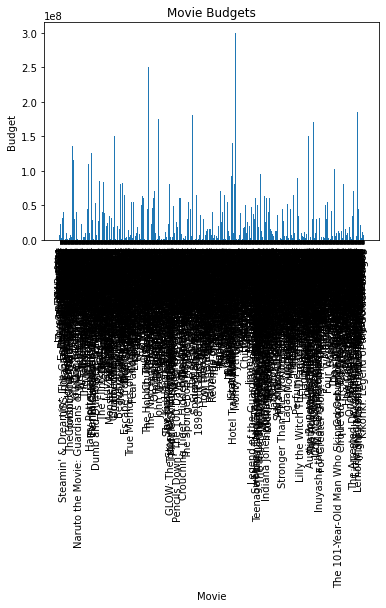

In [39]:
Movie_list = df4.reset_index()
plt.bar(Movie_list["Title"],Movie_list["Budget"])
plt.title("Movie Budgets")
plt.xlabel("Movie")
plt.ylabel("Budget")
plt.xticks(rotation=90)
plt.show()

In [40]:
pprint(Budget_data)

{'adult': False,
 'backdrop_path': '/yizHZ1ynp8INr1O6QNIg5yBLGtW.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}],
 'homepage': '',
 'id': 436459,
 'imdb_id': 'tt4955566',
 'original_language': 'en',
 'original_title': 'Almost Friends',
 'overview': 'A man in his mid-20s, still living at home with his mother and '
             'stepfather, puts all his eggs in one basket: the girl who works '
             'at his local coffee shop. The problem is, she has a serious '
             'boyfriend. As they become closer, the line between friendship '
             'and intimacy is blurred, and the situation forces both to '
             'examine where they are in their lives.',
 'popularity': 17.561,
 'poster_path': '/uJMknKxZagbhAYiiMjEaFnsZzRR.jpg',
 'production_companies': [{'id': 95157,
                           'logo_path': None,
                           'name': 'Let It Play',
                           'origin_c

In [41]:
df5=df2.loc[(df2["Budget"] !=0) & (df2["Revenue"] !=0) ,:]
df5.head()

Title    Budget Movie ID    Revenue
27        City of Joy  27000000    47821   14683921
39  The Spy Next Door  28000000    23172   45236543
45                ATM   3000000    89691       3010
48            One Day  15000000    51828   59389433
50     Shutter Island  80000000    11324  294804195

In [44]:
df6=df5.reset_index()
df6.head()

index              Title    Budget Movie ID    Revenue
0     27        City of Joy  27000000    47821   14683921
1     39  The Spy Next Door  28000000    23172   45236543
2     45                ATM   3000000    89691       3010
3     48            One Day  15000000    51828   59389433
4     50     Shutter Island  80000000    11324  294804195

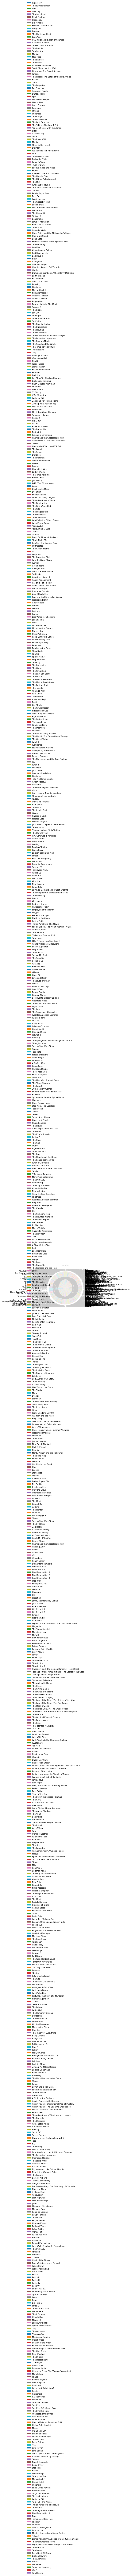

In [45]:
df6 = df6.set_index("Title")
plt.pie(df6["Revenue"], labels = df6.index, autopct = "%1.2f%%")
plt.title("Movie")
plt.legend(loc="right")
#plt.xticks(rotation=90)
plt.show()